# <font color=#ADD8E6> <h1><B>A DIVE INTO GOOGLE PLAY STORE </B></font>



---

<B>TEAM NAME</B> :  OUTLIERS
</br>
<B>TEAM MEMBERS</B> : <ul>
<li>Nanda Krishna</li>
<li>Prayash Kumar</li>
<li>Rajat Gaur</li>
<li>Shishir Tripathi</li>
</ul>
</br>
<a href="https://drive.google.com/drive/folders/1bXsj3fVPuT5hVFcagfpC2xV8T48Q4_cv">DRIVE LINK</a>
</br>
<a href="https://github.com/FreakyEinstein/dive-into-playstore">GIT REPOSITORY</a>
</br>
<a href="https://freakyeinstein-dive-into-playstore-deploy-ki4ke0.streamlitapp.com/">DEPLOYED RECOMMENDATION MODEL</a>

# <font color=#ADD8E6> INTRODUCTION </font>

<p>Have you ever gone to the Google Play Store to download an app only to find that it’s not compatible with your device? Or maybe you found an app that you wanted to try but it had so many negative reviews that you decided against it. It can be frustrating trying to find the right app among the millions that are available. This report is all about helping to decide what to choose based on your preference.</p>
</br>
<img src="https://helpdeskgeek.com/wp-content/pictures/2022/02/image-214.png" />

</br></br>
<B>GOAL</B>:</br>
<p>Our Goal is to get the details of apps from the play store and analyze the data to find any relational significance among the apps. This seems pretty simple at first glance, but the depth of insight is beyond comprehension. For initials we will be dealing with a large library of apps (2,654,747 as of now in July) and this number is still not consistent.</p>
</br>
<p>When involving countries with their own developers and own laws and policies, this data can upscale to a very large number. And each app in that large number has its own specifications like developer, country, price, genre, overall rate score, reviews, etc.</p>
</br>
<p>
Our main focus is to analyze the data gathered by our means and get useful information which can be further used to upgrade the usage/ launch of an app in any industrial sector. These findings might not only lead to a fruitful business establishment but also create better opportunities for the future.</p>
</br>
</br>

<B>APPROACH</B>:</br>

<p>We are using Google Play Scraper API (https://pypi.org/project/google-play-scraper/) for gathering the required data for our analysis. The API provides many functions, out of which we are interested in 3 main :
‘search’ , ‘app’ and ‘review’.</p>
<ol type='1'>

<li><p>Search - this function helps in gathering the appId based on the country they are used in and category they belong to.</p></li>
<li><p>App  -  based on appID, this function gathers all the information related to the app which includes its name, developer, score, ratings, reviews,etc..</p></li>
<li><p>Review - using the appID, we can get the reviews with names of the reviewer</li></p>
</ol>
<p>To get the AppID, we created a separate sheet to be used which includes the countries, currencies corresponding to the country, installation data, etc.</p>
</p>Using the above API, we plan to :</p>
<ul type='circle'>
<li>Fetch data using API</li>
<li>Data Exploration and Cleaning</li>
<li>Feature Engineering</li>
<li>Exploratory Data Analysis</li>
<li>Data Visualization</li>
</ul>
<p>Along with the basics, we want to step further and work with:</p>
<ul type='circle'>
<li>Principal Component analysis </li>
<li>Recommendation System</li>
<li>Model Deployment as Application</li>
</ul>

# <font color=#ADD8E6>Getting Started with Data Collection</font>

In [ ]:
# installing google_play_scrapper package
! pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing necessary libraries
import google_play_scraper as gps
import pandas as pd
import json
import pickle
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, utils, optimizers, regularizers

import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [ ]:
# getting all the possible functions of the library
gps.__dict__.keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__path__', '__file__', '__cached__', '__builtins__', 'constants', 'Sort', 'features', 'utils', 'exceptions', 'app', 'permissions', 'reviews', 'reviews_all', 'search'])

In [ ]:
# we could use search api
gps.__dict__['search']

<function google_play_scraper.features.search.search(query: str, n_hits: int = 30, lang: str = 'en', country: str = 'us') -> Dict[str, Any]>

# <font color=#ADD8E6>Link to the data files</font>

[Data_Files_Link](https://drive.google.com/drive/folders/1bXsj3fVPuT5hVFcagfpC2xV8T48Q4_cv?usp=sharing)


Comment the below cell if you're importing the above files from the local machine for a single runtime.

In [ ]:
# mounting google drive for storing and fetching any data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Give your Project's root Directory, rest is handled inside the arguments for paths.
# If on the local machine give the project directory.
ASSETS_DIRECTORY = '/content/drive/MyDrive/DS_1_Project/Assets'

In [ ]:
# we could get data based on different country, category
# let's decide on some of the different countries, categories
# reading the country_codes and categories from the respective csv files.
country_codes = pd.read_csv(f"{ASSETS_DIRECTORY}/CountryCodes.csv")['Country code'].tolist()
categories = pd.read_csv(f"{ASSETS_DIRECTORY}/categories.csv")["Category"].tolist()
len(country_codes), len(categories)

(75, 49)

#<font color=#ADD8E6>  Fetching the Data</font>

## <font color='red'>1.1 Warning</font>

---

- Please don't run the below cell, because it takes time to get the data 
for all the requirements.

- Instead use the ([apps_data file from the folder](https://drive.google.com/drive/folders/1bXsj3fVPuT5hVFcagfpC2xV8T48Q4_cv?usp=sharing)) link to download the json file.

In [ ]:
# gathering data based on country_codes( 50 ) and categories( 40 )
data_list = [ ] # an empty list to add the dynamically fetched data.
for country in country_codes:
    for cat in categories:
      try:
        # if the connection is successful the search api will fetch 
        # 30 top applications for the respective -- {category, country and language(default='en')}
        # the fetched data from search function will be appended to a list "data_list"
            temp = gps.search(
                query=cat,
                lang='en',
                country=country,
                n_hits=30)
            data_list.append(temp)
      except:
        # if there occurs an connection failure the loop is not abruptly halted.
        pass

In [ ]:
len(data_list) # to get the number of entries from the search API.

600

In [ ]:
# writing all the fetched data into a JSON file and storing it in the Project Folder situated in the drive.
# naming it as "apps_data"
with open(f"{ASSETS_DIRECTORY}/apps_data.json", "w") as dump_file:
  json.dump(data_list, dump_file)

In [ ]:
# to read the fetched data directly instead of running the Search API again.
with open(f"{ASSETS_DIRECTORY}/apps_data.json", "r") as f:
  apps_data = json.load(f)

In [ ]:
len(apps_data)

600

In [ ]:
apps_data[0][0] # one record of an app looks like this.

{'appId': 'com.brakefield.idfree',
 'icon': 'https://play-lh.googleusercontent.com/8N60kKO2AkQ3WjtIKJNL5sPnxaoZLrKaQh6z6dxOIbGoqHQUG313ZpotbmtpaPJ52X4',
 'screenshots': ['https://play-lh.googleusercontent.com/j93OjtfvcW9707UbWWQumLonjKwQuRvbWmnOHJZtqiZ03d80ReWuwOmUi984CLCESAo',
  'https://play-lh.googleusercontent.com/6P-ElsTmdYNiLD6X5uUqT8zGH8MIOigDH5CLLWgUuMfqdJgz6fIA8jKrusmtk2ySRQ',
  'https://play-lh.googleusercontent.com/JvpDDx3YE_asmzQK5-nSLVMJmJHwlqobkRZ43Q-IwcIG8omqy0g73CtT2dpOeE7XAmow',
  'https://play-lh.googleusercontent.com/pDKY1RsBxQAkTf6YETicy_Dno7IAHnUGOV9OiJly-gg2yMKz9g0jO_BGsUTaPzCtRb2v',
  'https://play-lh.googleusercontent.com/zcGxK0ZS3JPKWlOhPNh63u_gtvVvLiZ0LAA5bemjWWKVxKKlREtcgnhYzwDeJgrRBYw',
  'https://play-lh.googleusercontent.com/5iykW_IWftf_BhY4g1xQik_r7jwJZlvTg3qbtz1v1L2XkTkmgFu4kjWPWUrN-5sdBqQ',
  'https://play-lh.googleusercontent.com/FjliC_crpfy-p6coTeecxwDELmSIoByIPxuyud0rFBjD2WIju7nntxtAmQBcc1cUcXM',
  'https://play-lh.googleusercontent.com/kXw9cV2NmP9-0

In [ ]:
# making the entire app_data into a single dictionary. 
# appId is the keys for the dictionary, each appId is unique so any duplicates will be handled 
app_dict = { }
for i in range(len(apps_data)):
    for j in range(len(apps_data[i])):
        if apps_data[i][j]['appId'] not in app_dict.keys(): 
            app_dict[f"{apps_data[i][j]['appId']}"] = apps_data[i][j]

In [ ]:
len(app_dict.keys()) # to know how many unique apps are there

2100

In [ ]:
# saving the unique app_dict as a JSON.
with open(f"{ASSETS_DIRECTORY}/app_dict.json", "w") as f:
  json.dump(app_dict, f)

In [ ]:
# loading the saved file directly.
with open(f"{ASSETS_DIRECTORY}/app_dict.json") as f:
  app_dict = json.load(f)

## 1.2 Creating the Apps Dataframe after Data collection

In [ ]:
# making the dataframe of apps
apps = pd.DataFrame.from_dict(data = app_dict, orient = 'index').reset_index()

In [ ]:
# removing index column from dataframe because it is doing the same purpose as appID
apps.drop('index', axis = 1, inplace = True)

In [ ]:
# saving the dataframe as a csv 
apps.to_csv(f"{ASSETS_DIRECTORY}/apps_data.csv", index=False)

In [ ]:
# loading the saved csv file
apps = pd.read_csv(f"{ASSETS_DIRECTORY}/apps_data.csv")

In [ ]:
apps.columns

Index(['index', 'appId', 'title', 'score', 'genre', 'price', 'free',
       'installs'],
      dtype='object')

In [ ]:
# Let's look at the structure of the Dataframe. 
apps.head()

,index,appId,title,score,genre,price,free,installs
0,com.brakefield.idfree,com.brakefield.idfree,Infinite Design,3.740000,Art & Design,0.0,True,"10,000,000+"
1,com.canva.editor,com.canva.editor,"Canva: Design, Photo & Video",4.738635,Art & Design,0.0,True,"100,000,000+"
2,com.adobe.spark.post,com.adobe.spark.post,Adobe Express: Graphic Design,4.681319,Art & Design,0.0,True,"10,000,000+"
3,com.delgeo.desygner,com.delgeo.desygner,Desygner: Graphic Design Maker,4.890000,Art & Design,0.0,True,"5,000,000+"
4,com.brakefield.painter,com.brakefield.painter,Infinite Painter,4.247525,Art & Design,0.0,True,"10,000,000+"


## 1.3 Reviews Section

In [ ]:
gps.__dict__['reviews_all']

<function google_play_scraper.features.reviews.reviews_all(app_id: str, sleep_milliseconds: int = 0, **kwargs) -> list>

In [ ]:
gps.__dict__['reviews']

<function google_play_scraper.features.reviews.reviews(app_id: str, lang: str = 'en', country: str = 'us', sort: google_play_scraper.constants.google_play.Sort = <Sort.NEWEST: 2>, count: int = 100, filter_score_with: int = None, continuation_token: google_play_scraper.features.reviews._ContinuationToken = None) -> Tuple[List[dict], google_play_scraper.features.reviews._ContinuationToken]>

In [ ]:
# getting the appIds into a list
keys_list = list(app_dict.keys())

In [ ]:
# fetching reviews for all the saved appID's we have and
# making a dictionary with the keys as appID's. 
review_dict = { }
for i in range(len(keys_list)):
  # index is 0 because the function returns a tuple with two values and second value is not needed.
  review_dict[keys_list[i]] = gps.reviews(app_id=keys_list[i], lang='en', count=100)[0]

In [ ]:
len(review_dict.keys())

2100

In [ ]:
# saving the reviews dictionary in a file 
with open(f"{ASSETS_DIRECTORY}/review_dict", "wb") as f:
  pickle.dump(review_dict, f)

In [ ]:
with open(f"{ASSETS_DIRECTORY}/review_dict", "rb") as f:
  review_dict = pickle.load(f)

In [ ]:
# making the dataframe for the review_dict
columns=['appId', 'reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount']
reviews_df = [ ]
for key, value in review_dict.items():
  # print(value)
  for i in value:
    # print(i)
    temp_li = []
    for innerKey, innerValue in i.items():
      if innerKey in columns:
        # print(innerKey, ":", innerValue)
        temp_li.append(innerValue)
    temp_dict = {
      'appId': key,
      'reviewId': temp_li[0],
      'userName': temp_li[1],
      'userImage': temp_li[2],
      'content': temp_li[3],
      'score': temp_li[4],
      'thumbsUpCount': temp_li[5]
    }
    # print(temp_dict)
    reviews_df.append(temp_dict)

In [ ]:
# making the Dataframe of all the fetched reviews with the appId's corresponding to the records.
review_df = pd.DataFrame(reviews_df, columns=columns)

In [ ]:
# looking into the structure of the reviews dataframe.
review_df.head()

,appId,reviewId,userName,userImage,content,score,thumbsUpCount
0,com.brakefield.idfree,e0ba31b2-28e9-4746-b29d-99e13188b9b6,Tariq Naqi,https://play-lh.googleusercontent.com/a-/ACNPE...,It nice however no clipping mask option and fi...,3,0
1,com.brakefield.idfree,e4021b2a-f5a5-4146-a713-a6c7ea2033a3,sakirunnisha Shaikh,https://play-lh.googleusercontent.com/a-/ACNPE...,Rug in my bedroom with my hair cut off and the...,5,0
2,com.brakefield.idfree,b926cb99-13a9-48cf-a95f-4c9f28657fc7,Mochamad Rizki,https://play-lh.googleusercontent.com/a-/ACNPE...,i'll give 5 start if u fix bug,3,0
3,com.brakefield.idfree,8fee17ca-871c-4b03-9b24-56e9ae8be6f1,T T F,https://play-lh.googleusercontent.com/a-/ACNPE...,Sharu,5,0
4,com.brakefield.idfree,3ecada7a-d926-4440-8dce-30e1df312194,DÀRK KÑÍGHT,https://play-lh.googleusercontent.com/a-/ACNPE...,BEST APP YO DRAW,5,0


In [ ]:
# saving the dataframe into a csv file
review_df.to_csv(f"{ASSETS_DIRECTORY}/reviews.csv", index=False)

In [ ]:
# loading the saved dataframe from the project directory
review_df = pd.read_csv(f"{ASSETS_DIRECTORY}/reviews.csv")

In [ ]:
review_df.shape

(185378, 7)

# <font color=#ADD8E6> EXPLORATORY DATA ANALYSIS</font>

In [ ]:
# reading the dataframe
apps = pd.read_csv(f"{ASSETS_DIRECTORY}/apps_data.csv")
apps.head()

,appId,icon,screenshots,title,score,genre,price,free,currency,video,videoImage,description,descriptionHTML,developer,installs
0,com.brakefield.idfree,https://play-lh.googleusercontent.com/8N60kKO2...,['https://play-lh.googleusercontent.com/j93Ojt...,Infinite Design,3.740000,Art & Design,0.0,True,ZAR,NaN,NaN,"Rebuilt from the ground up: blazing fast, incr...","Rebuilt from the ground up: blazing fast, incr...",Infinite Studio LLC,"10,000,000+"
1,com.canva.editor,https://play-lh.googleusercontent.com/A7xdnzRk...,['https://play-lh.googleusercontent.com/z-PX8k...,"Canva: Design, Photo & Video",4.738635,Art & Design,0.0,True,ZAR,https://www.youtube.com/embed/Ftvtakut-AM?ps=p...,https://i.ytimg.com/vi/Ftvtakut-AM/hqdefault.jpg,<b>Canva is your free photo editor and video e...,<b>Canva is your free photo editor and video e...,Canva,"100,000,000+"
2,com.adobe.spark.post,https://play-lh.googleusercontent.com/Su39nteY...,['https://play-lh.googleusercontent.com/z1G5Me...,Adobe Express: Graphic Design,4.681319,Art & Design,0.0,True,ZAR,https://www.youtube.com/embed/dYwmmcb7rE4?ps=p...,https://i.ytimg.com/vi/dYwmmcb7rE4/hqdefault.jpg,Adobe Express enables you to quickly and easil...,Adobe Express enables you to quickly and easil...,Adobe,"10,000,000+"
3,com.delgeo.desygner,https://play-lh.googleusercontent.com/l8gz7zcH...,['https://play-lh.googleusercontent.com/xCT-xc...,Desygner: Graphic Design Maker,4.890000,Art & Design,0.0,True,ZAR,https://www.youtube.com/embed/f6oCeLkshHk?ps=p...,https://i.ytimg.com/vi/f6oCeLkshHk/hqdefault.jpg,⭐ <b><i>“THE EASIEST & BEST GRAPHIC DESIGN APP...,⭐ <b><i>“THE EASIEST &amp; BEST GRAPHIC DESIGN...,Desygner Pty Ltd,"5,000,000+"
4,com.brakefield.painter,https://play-lh.googleusercontent.com/YNxwUNwB...,['https://play-lh.googleusercontent.com/C3YTOJ...,Infinite Painter,4.247525,Art & Design,0.0,True,ZAR,https://www.youtube.com/embed/KdlfGMohVIo?ps=p...,https://i.ytimg.com/vi/KdlfGMohVIo/hqdefault.jpg,"Experience one of the best-designed painting, ...","Experience one of the best-designed painting, ...",Infinite Studio LLC,"10,000,000+"


### **1.1 Checking Null Values**

The first step for analyzing our dataset is to check for null values.

In [ ]:
# checking the number of null values in the dataframe
apps.isnull().sum()

appId                 0
icon                  0
screenshots           0
title                 0
score                11
genre                 0
price                 0
free                  0
currency              0
video              1256
videoImage         1256
description           0
descriptionHTML       0
developer             0
installs              0
dtype: int64

In [ ]:
apps.columns

Index(['appId', 'icon', 'screenshots', 'title', 'score', 'genre', 'price',
       'free', 'currency', 'video', 'videoImage', 'description',
       'descriptionHTML', 'developer', 'installs'],
      dtype='object')

### 1.2 Dropping Columns

In the above dataframe, there are 1256 videos and videoImages in the dataframe which are NaN values. Moreover, in the dataframe, there are many columns which we do not need. Hence, we have decided to drop them.

In [ ]:
# dropping unncecessary columns
columns_to_drop = ['icon','screenshots','video','videoImage','descriptionHTML']
apps.drop(columns_to_drop, axis = 1, inplace = True)

In [ ]:
apps.head()

,appId,title,score,genre,price,free,currency,description,developer,installs
0,com.brakefield.idfree,Infinite Design,3.740000,Art & Design,0.0,True,ZAR,"Rebuilt from the ground up: blazing fast, incr...",Infinite Studio LLC,"10,000,000+"
1,com.canva.editor,"Canva: Design, Photo & Video",4.738635,Art & Design,0.0,True,ZAR,<b>Canva is your free photo editor and video e...,Canva,"100,000,000+"
2,com.adobe.spark.post,Adobe Express: Graphic Design,4.681319,Art & Design,0.0,True,ZAR,Adobe Express enables you to quickly and easil...,Adobe,"10,000,000+"
3,com.delgeo.desygner,Desygner: Graphic Design Maker,4.890000,Art & Design,0.0,True,ZAR,⭐ <b><i>“THE EASIEST & BEST GRAPHIC DESIGN APP...,Desygner Pty Ltd,"5,000,000+"
4,com.brakefield.painter,Infinite Painter,4.247525,Art & Design,0.0,True,ZAR,"Experience one of the best-designed painting, ...",Infinite Studio LLC,"10,000,000+"


In [ ]:
# getting the info about the apps dataframe
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appId        2100 non-null   object 
 1   title        2100 non-null   object 
 2   score        2089 non-null   float64
 3   genre        2100 non-null   object 
 4   price        2100 non-null   float64
 5   free         2100 non-null   bool   
 6   currency     2100 non-null   object 
 7   description  2100 non-null   object 
 8   developer    2100 non-null   object 
 9   installs     2100 non-null   object 
dtypes: bool(1), float64(2), object(7)
memory usage: 149.8+ KB


We can see that most of the columns are an 'object' dtype. We will do the needful conversion as we go on with visualising the data

### 1.3 Data Visualisation

#### 1.3.1 Unique Categories/ Genres

We have 48 Categories/ genres in the dataset. Each app belongs to one of these genres. We are going to visualise the frequency distribution of the apps for each of the genres.

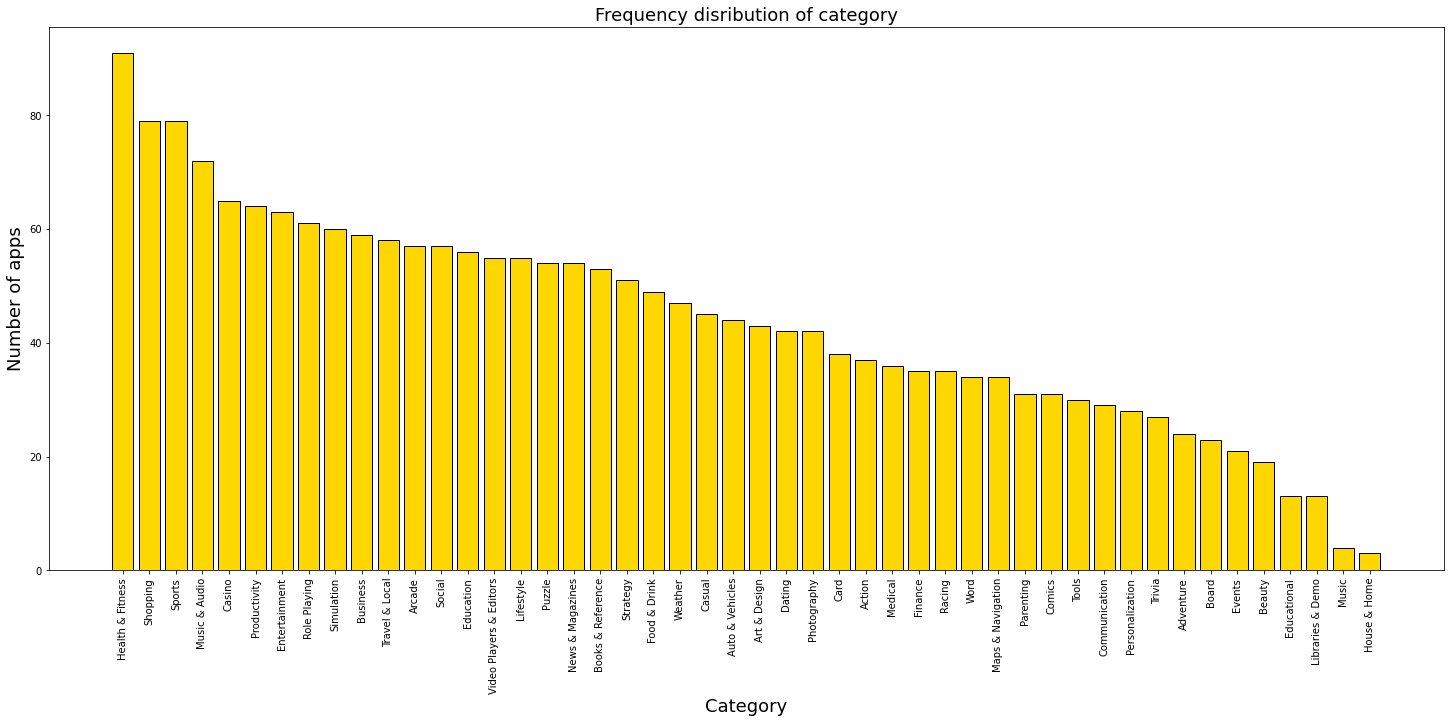

In [ ]:
# checking the frequency plot of Genres
total_genre_count = apps.genre.value_counts()


#plotting the distribution for the top 10 developers
plt.figure(figsize = (25,10))
plt.bar(total_genre_count.index, total_genre_count, color = 'gold', edgecolor = 'k')
plt.xticks(rotation = 90)
plt.xlabel('Category', size = 18)
plt.ylabel('Number of apps', size = 18)
plt.title('Frequency disribution of category', size = 18)
plt.show()

#### 1.3.2 Unique Developers

There are a number of developers in the dataframe. But we are interested in only thge top 10 most recurring developers

Text(0.5, 1.0, 'Bar plot showing the number of apps developed by the top 10 developers')

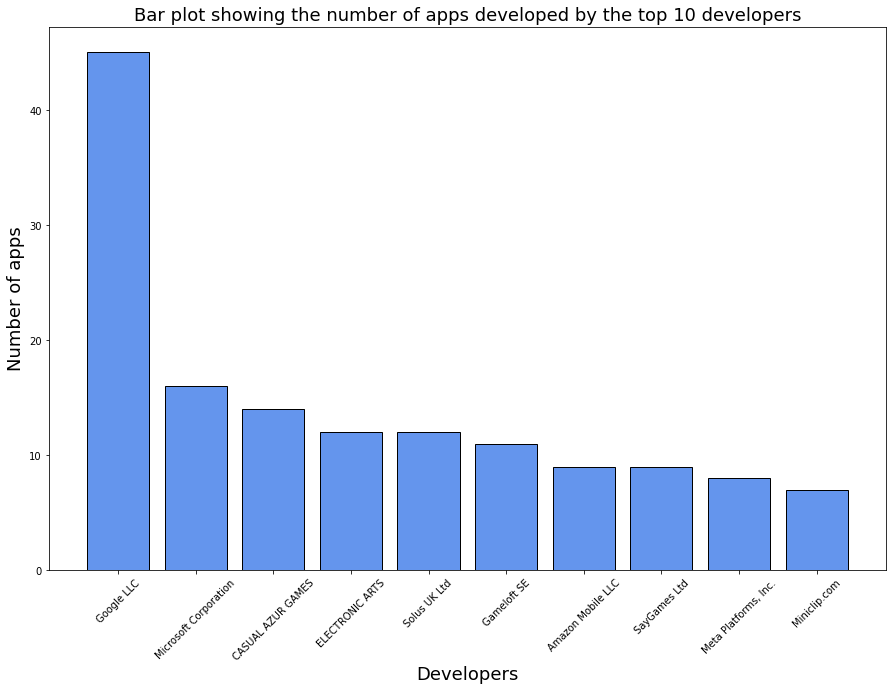

In [ ]:
# getting the most recurring developers in the dataframe and sorting them as top 10
top_10_developers = apps.developer.value_counts().head(10)


#plotting the distribution for the top 10 developers
plt.figure(figsize = (15,10))
plt.bar(top_10_developers.index, top_10_developers, color = 'cornflowerblue', edgecolor = 'k')
plt.xticks(rotation = 45)
plt.xlabel('Developers', size = 18)
plt.ylabel('Number of apps', size = 18)
plt.title('Bar plot showing the number of apps developed by the top 10 developers', size = 18)

As we can see from the Distribution, Google LLC is the developer for most of the apps, followed by Microsoft. Amazon takes up the 7th place in the distribution and Metaverse Apps on 9th place.

While the above 4 developers are well known for their influence in many of the products based apps, there are some developers which solely deal with entertainment and games -  SayGames, Electronic Arts, Gameloft and Miniclip are all notable developers.

We are interested in the Categorical distribution for the 4 tech giants.

##### 1.3.2.1 Google LLC categorical Distribution

Text(0.5, 1.0, 'Distribution of each category in which Google LLC launched an app')

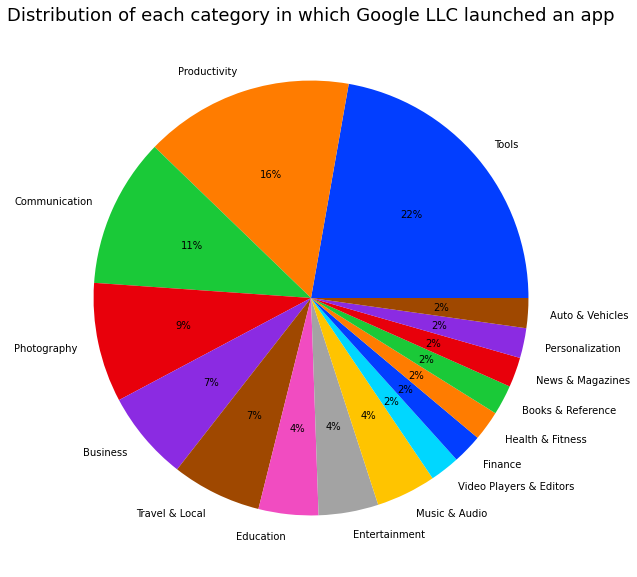

In [ ]:
# getting the distribution of each category in which google has launched an app
google_apps = apps[apps['developer']== 'Google LLC']
genre_count = google_apps['genre'].value_counts()

palette_color = sns.color_palette('bright')
# plotting the generated data above
plt.figure(figsize = (15,10))
plt.pie(genre_count, labels=genre_count.index, colors=palette_color, autopct='%.0f%%')

# in case to check the bar chart, uncomment the codes below
# plt.bar(genre_count.index, genre_count, color = 'lightseagreen', edgecolor = 'k')
# plt.xticks(rotation = 45)
# plt.xlabel('Category', size = 18)
# plt.ylabel('Number of apps', size = 18)
plt.title('Distribution of each category in which Google LLC launched an app', size = 18)

Google LLC is launching most of their apps in the tools Category, followed by Productivity and then Communication

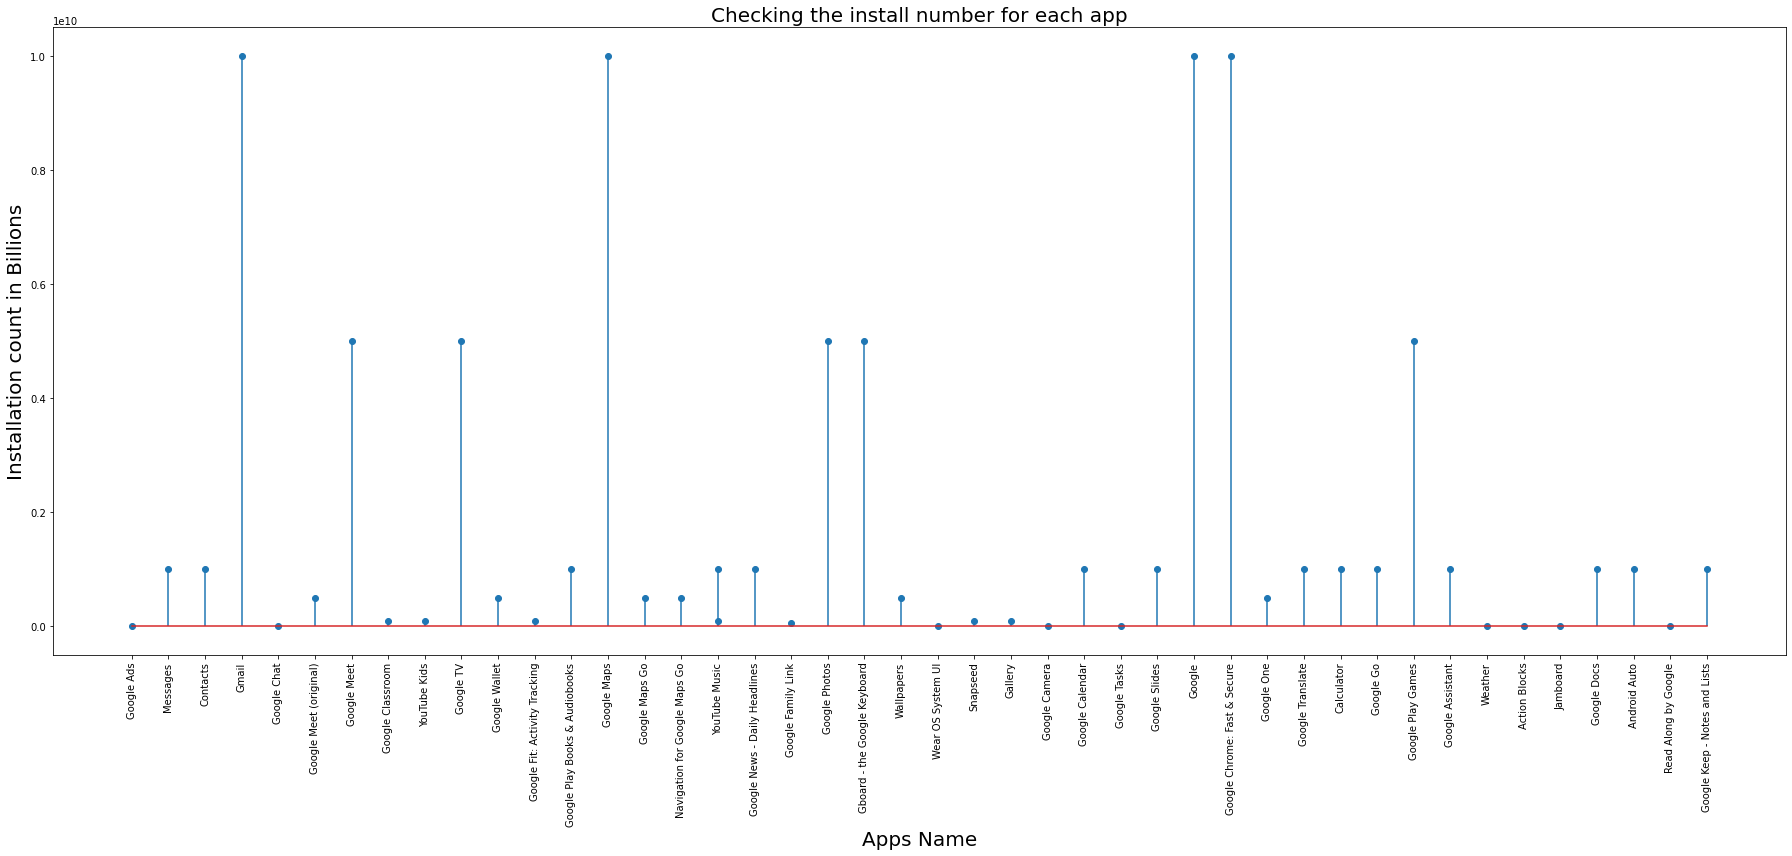

In [ ]:
# doing a stem plot for the apps to check their installation count

google_apps = apps[apps['developer']== 'Google LLC']

plt.figure(figsize = (25,12))
plt.stem(google_apps.title, google_apps['installs'], use_line_collection = True)
plt.xticks(rotation = 90)
plt.xlabel('Apps Name', size =20)
plt.ylabel('Installation count in Billions', size =20)
plt.title('Checking the install number for each app', size =20)
plt.tight_layout()

##### 1.3.2.2 Amazon LLC categorical Distribution

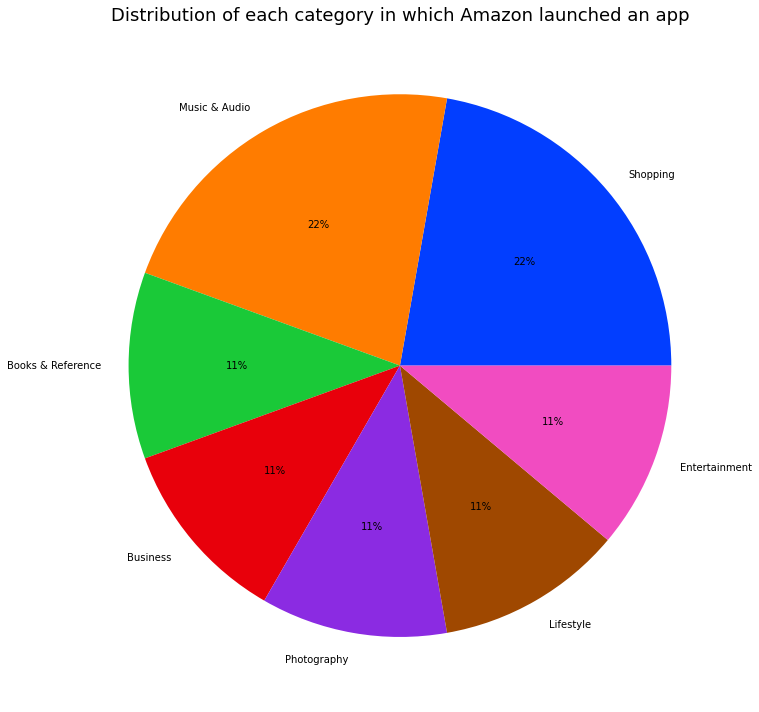

In [ ]:
# getting the distribution of each category in which Amazon has launched an app
amazon_apps = apps[apps['developer']== 'Amazon Mobile LLC']
genre_count = amazon_apps['genre'].value_counts()

palette_color = sns.color_palette('bright')

# plotting the generated data above
plt.figure(figsize = (25,10))
plt.pie(genre_count, labels=genre_count.index, colors=palette_color, autopct='%.0f%%')

# in case to check the bar chart, uncomment the codes below
# plt.bar(genre_count.index, genre_count, color = 'Salmon', edgecolor = 'k')
# plt.xticks(rotation = 45)
# plt.xlabel('Category', size = 18)
# plt.ylabel('Number of apps', size = 18)
plt.title('Distribution of each category in which Amazon launched an app', size = 18)
plt.tight_layout()

Similarly, Amazon is doing most of the launcing of apps in Shopping sector.

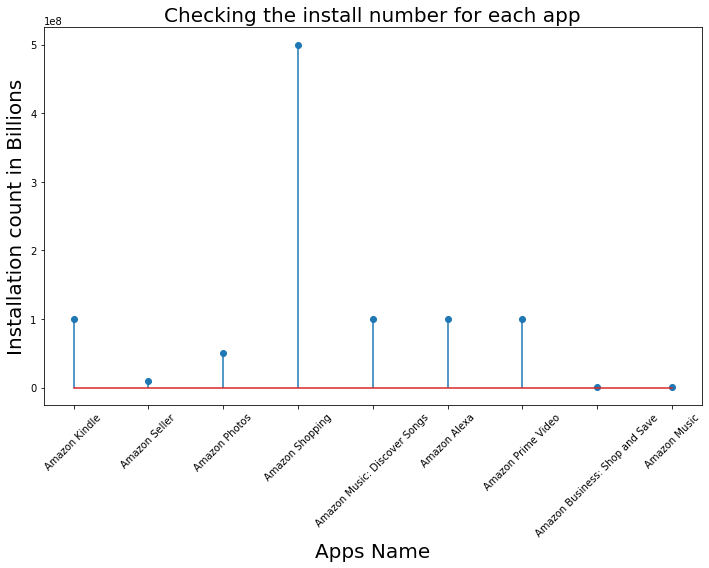

In [ ]:
# doing a stem plot for the apps to check their installation count

amazon_apps = apps[apps['developer']== 'Amazon Mobile LLC']

plt.figure(figsize = (10,8))
plt.stem(amazon_apps.title, amazon_apps['installs'], use_line_collection = True)
plt.xticks(rotation = 45)
plt.xlabel('Apps Name', size =20)
plt.ylabel('Installation count in Billions', size =20)
plt.title('Checking the install number for each app', size =20)
plt.tight_layout()

##### 1.3.2.3 Microsoft categorical Distribution

Text(0.5, 1.0, 'Distribution of each category in which Microsoft launched an app')

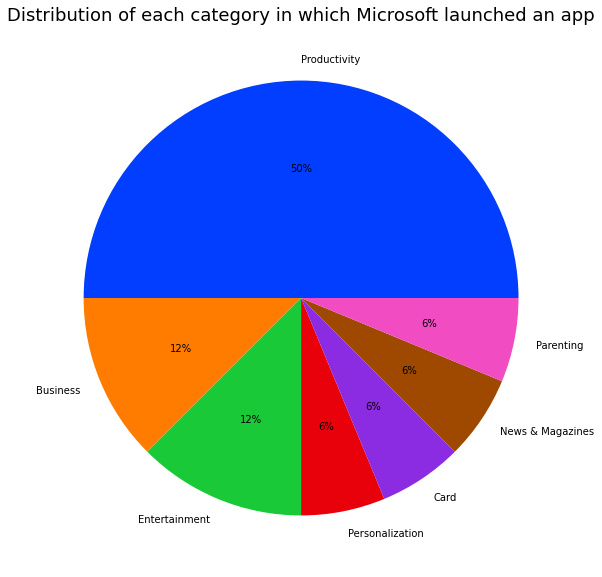

In [ ]:
# getting the distribution of each category in which Amazon has launched an app
ms_apps = apps[apps['developer']== 'Microsoft Corporation']
genre_count = ms_apps['genre'].value_counts()

# plotting the generated data above
plt.figure(figsize = (15,10))
plt.pie(genre_count, labels=genre_count.index, colors=palette_color, autopct='%.0f%%')

# in case to check the bar chart, uncomment the codes below
# plt.bar(genre_count.index, genre_count, color = '#feffb3', edgecolor = 'k')
# plt.xticks(rotation = 45)
# plt.xlabel('Category', size = 18)
# plt.ylabel('Number of apps', size = 18)
plt.title('Distribution of each category in which Microsoft launched an app', size = 18)

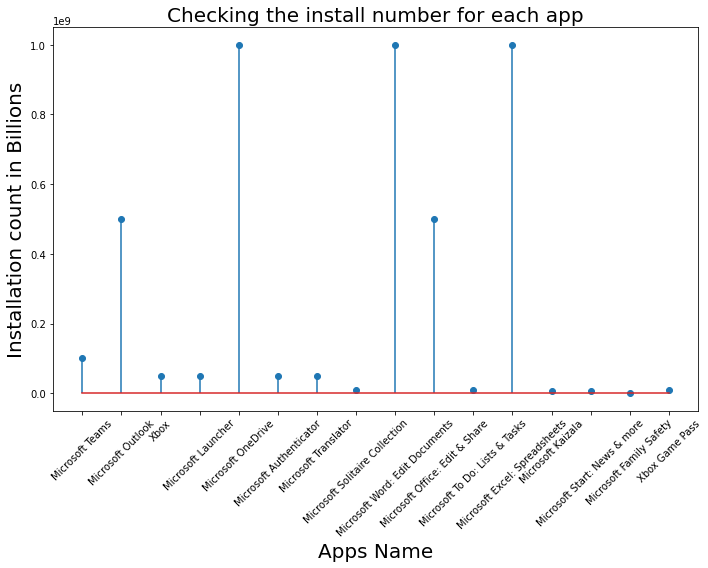

In [ ]:
# doing a stem plot for the apps to check their installation count

ms_apps = apps[apps['developer']== 'Microsoft Corporation']

plt.figure(figsize = (10,8))
plt.stem(ms_apps.title, ms_apps['installs'], use_line_collection = True)
plt.xticks(rotation = 45)
plt.xlabel('Apps Name', size =20)
plt.ylabel('Installation count in Billions', size =20)
plt.title('Checking the install number for each app', size =20)
plt.tight_layout()

##### 1.3.2.4 Metaverse Ltd. categorical Distribution

Text(0.5, 1.0, 'Distribution of each category in which Metaverse launched an app')

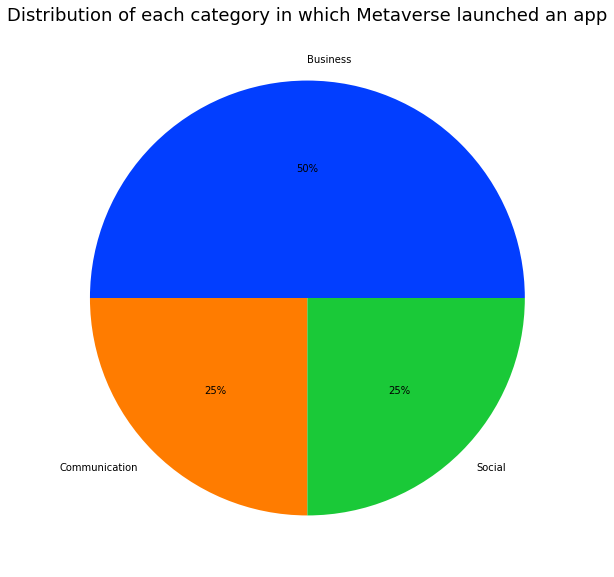

In [ ]:
# getting the distribution of each category in which Amazon has launched an app
meta_apps = apps[apps['developer']== 'Meta Platforms, Inc.']
meta_apps.head()
genre_count = meta_apps['genre'].value_counts()

# plotting the generated data above
plt.figure(figsize = (15,10))
plt.pie(genre_count, labels=genre_count.index, colors=palette_color, autopct='%.0f%%')

# in case to check the bar chart, uncomment the codes below
# plt.bar(genre_count.index, genre_count, color = '#F0E442', edgecolor = 'k')
# plt.xticks(rotation = 45)
# plt.xlabel('Category', size = 18)
# plt.ylabel('Number of apps', size = 18)
plt.title('Distribution of each category in which Metaverse launched an app', size = 18)

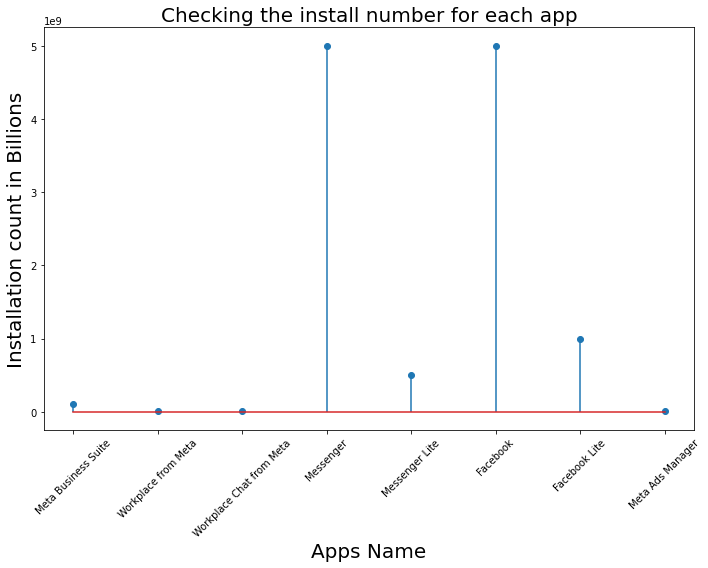

In [ ]:
# doing a stem plot for the apps to check their installation count

meta_apps = apps[apps['developer']== 'Meta Platforms, Inc.']

plt.figure(figsize = (10,8))
plt.stem(meta_apps.title, meta_apps['installs'], use_line_collection = True)
plt.xticks(rotation = 45)
plt.xlabel('Apps Name', size =20)
plt.ylabel('Installation count in Billions', size =20)
plt.title('Checking the install number for each app', size =20)
plt.tight_layout()

#### 1.3.3 Relationship between Installations

Here we are converting the Installs into a categorical column while keeping the datatype as integer intact.
This is because the original dataframe had installs values as an approximation - '1,000+'

The converted installs column has been stripped of '+' but we are still using the previous info, i.e., we are keeping the values of installs and inferring it as 'atleast' 
for eg- 10,000,000 installs means atleast 10 million installs were made.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Text(0.5, 1.0, 'Distribution depicting the number of apps in each download category')

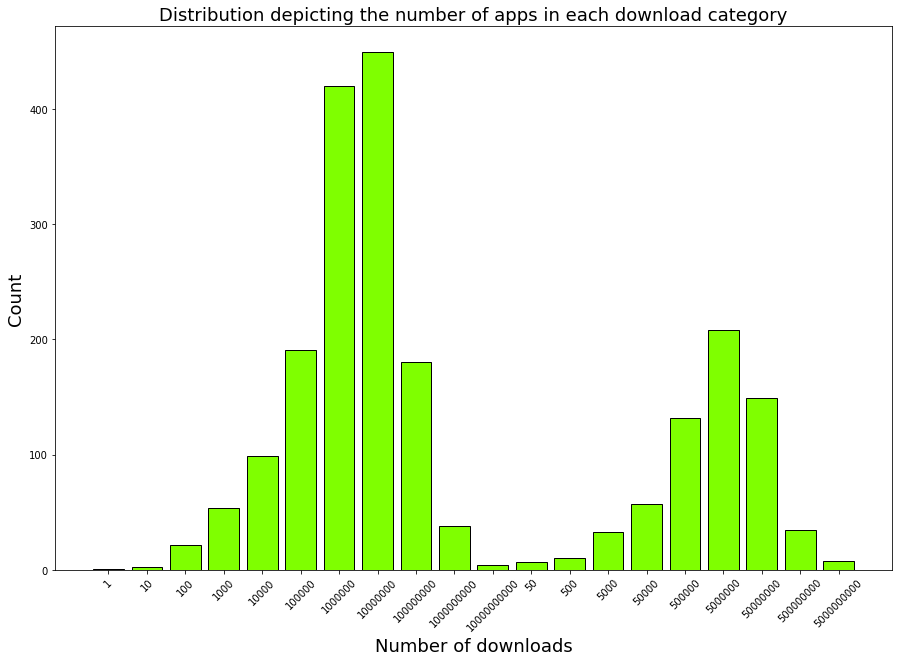

In [ ]:
# checking the unique number of times apps were installed
apps.installs = apps.installs.str.replace('+','')
apps.installs = apps.installs.str.replace(',','')
apps.installs.astype('int')

installs_sorted = apps['installs'].value_counts().sort_index()


# plotting the above generated data
plt.figure(figsize = (15,10))
plt.bar(sorted(installs_sorted.index), installs_sorted, color = 'chartreuse', edgecolor = 'k')
plt.xticks(rotation = 45)
plt.xlabel('Number of downloads', size = 18)
plt.ylabel('Count', size = 18)
plt.title('Distribution depicting the number of apps in each download category', size = 18)

In [ ]:
# apps having over a billion installs
apps[apps['installs'] == '10000000000']

,appId,title,score,genre,price,free,currency,description,developer,installs
167,com.google.android.gm,Gmail,4.404446,Communication,0.0,True,ZAR,The official Gmail app brings the best of Gmai...,Google LLC,10000000000
415,com.google.android.apps.maps,Google Maps,4.383826,Travel & Local,0.0,True,ZAR,Navigate your world faster and easier with Goo...,Google LLC,10000000000
678,com.google.android.googlequicksearchbox,Google,4.365983,Tools,0.0,True,ZAR,The Google app keeps you in the know about thi...,Google LLC,10000000000
679,com.android.chrome,Google Chrome: Fast & Secure,4.227012,Communication,0.0,True,ZAR,"Google Chrome is a fast, easy to use, and secu...",Google LLC,10000000000


These are the apps which have over 1 billion installs

#### 1.3.4 Converting Dtypes

Let's Check the datatypes of each column in the dataset.

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appId        2100 non-null   object 
 1   title        2100 non-null   object 
 2   score        2089 non-null   float64
 3   genre        2100 non-null   object 
 4   price        2100 non-null   float64
 5   free         2100 non-null   bool   
 6   currency     2100 non-null   object 
 7   description  2100 non-null   object 
 8   developer    2100 non-null   object 
 9   installs     2100 non-null   object 
dtypes: bool(1), float64(2), object(7)
memory usage: 149.8+ KB


Here we can see, except 'Score', 'Price' (which are in float) and 'free'(which is boolean), all the other columns have object datatype.

Now, there are few columns which should be int or float, but are object in the original dataset. For eg - installs should be in int/float.

We will be converting the columns 'Free' and 'installs' to int dtype. 

In [ ]:
# converting selective columns to a integer datatype
apps.installs = pd.to_numeric(apps.installs)
apps.free = np.where(apps.free == True, 1, 0)
apps.price = pd.to_numeric(apps.price)

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appId        2100 non-null   object 
 1   title        2100 non-null   object 
 2   score        2089 non-null   float64
 3   genre        2100 non-null   object 
 4   price        2100 non-null   float64
 5   free         2100 non-null   int64  
 6   currency     2100 non-null   object 
 7   description  2100 non-null   object 
 8   developer    2100 non-null   object 
 9   installs     2100 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 164.2+ KB


Now all our columns are in proper datatype format.

Now let's check the unique values in currency column, as it contains the currency for each country the app is extracted from.

In [ ]:
apps.currency.unique()

array(['ZAR', 'VND', 'USD', 'UZS', 'PAB', 'OMR', 'NZD', 'NOK', 'HNL',
       'HKD', 'GTQ', 'EUR', 'BHD', 'AUD'], dtype=object)

Here, we have 14 unique Currencies and we will be attempting to convert it all to a single currency (USD) and get the price corresponding to it.

In [ ]:
# creating a new column to be used for getting the price in USD
rate = pd.DataFrame([['ZAR', 0.0552],
                     ['VND', 0.000042],
                     ['EUR', 0.97],
                     ['LBP', 0.0007],
                     ['USD', 1],
                     ['UZS',0.000090],
                     ['PAB', 1],
                     ['OMR',2.60],
                     ['NZD',0.56],
                     ['NOK',0.093],
                     ['HNL',0.040],
                     ['HKD',0.13],
                     ['GTQ',0.13],
                     ['BHD',2.65],
                     ['AUD',0.63]], columns = ['Curr', 'Value'])

# merging the original dataframe and currency dataframe
final_df = pd.merge(apps, rate, how = 'left', left_on = 'currency', right_on = 'Curr')

# getting the value in USD for the original dataframe
final_df['Price in USD'] = final_df['price'] * final_df['Value']
final_df.head()

,appId,title,score,genre,price,free,currency,description,developer,installs,Curr,Value,Price in USD
0,com.brakefield.idfree,Infinite Design,3.740000,Art & Design,0.0,1,ZAR,"Rebuilt from the ground up: blazing fast, incr...",Infinite Studio LLC,10000000,ZAR,0.0552,0.0
1,com.canva.editor,"Canva: Design, Photo & Video",4.738635,Art & Design,0.0,1,ZAR,<b>Canva is your free photo editor and video e...,Canva,100000000,ZAR,0.0552,0.0
2,com.adobe.spark.post,Adobe Express: Graphic Design,4.681319,Art & Design,0.0,1,ZAR,Adobe Express enables you to quickly and easil...,Adobe,10000000,ZAR,0.0552,0.0
3,com.delgeo.desygner,Desygner: Graphic Design Maker,4.890000,Art & Design,0.0,1,ZAR,⭐ <b><i>“THE EASIEST & BEST GRAPHIC DESIGN APP...,Desygner Pty Ltd,5000000,ZAR,0.0552,0.0
4,com.brakefield.painter,Infinite Painter,4.247525,Art & Design,0.0,1,ZAR,"Experience one of the best-designed painting, ...",Infinite Studio LLC,10000000,ZAR,0.0552,0.0


In [ ]:
# since we do not need the 'price', 'currency', 'Curr', 'Value' columns, we will be dropping them.
final_df.drop(['price', 'currency', 'Curr', 'Value'], axis = 1, inplace = True)

#### 1.3.4.1 Frequency Distribution of Free apps

Since there are prices for some of the apps, so we can confirm that there are apps which are Paid too and not free. We will be visualising the Apps which are paid and which are free.

Text(0.5, 1.0, 'Frequency distribution for apps which are free or paid')

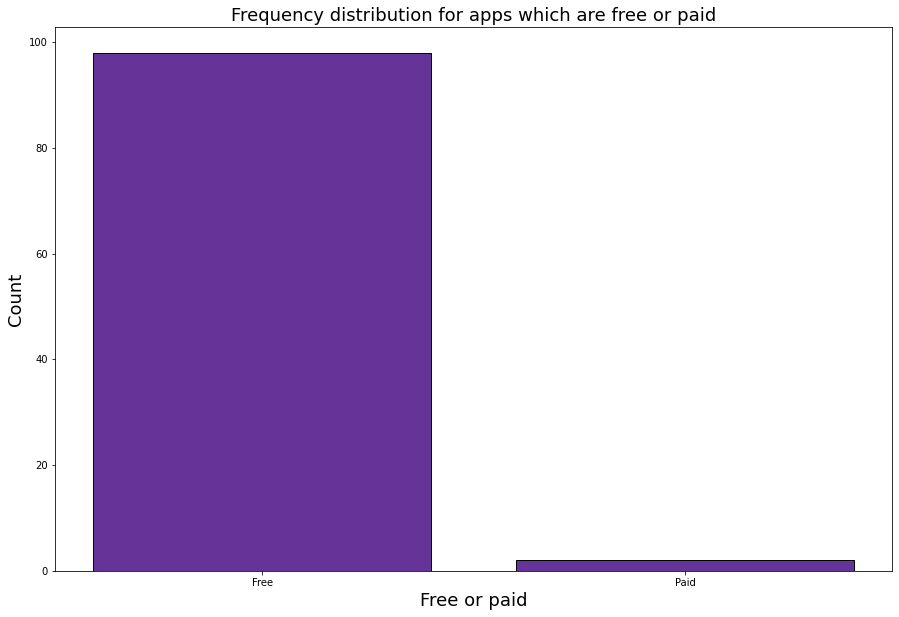

In [ ]:
free_or_not = final_df.free.value_counts()/ len(final_df.free)* 100

plt.figure(figsize = (15,10))
plt.bar(['Free','Paid'], free_or_not, color = 'rebeccapurple', edgecolor = 'k')
# plt.xticks(rotation = 45)
plt.xlabel('Free or paid', size = 18)
plt.ylabel('Count', size = 18)
plt.title('Frequency distribution for apps which are free or paid', size = 18)

## More Data Cleaning and Feature Engineering. More! More! More!

Let's Check the Description and info of the New dataframe we got.

In [ ]:
final_df.describe()

,score,free,installs,Price in USD
count,2089.000000,2100.000000,2.100000e+03,2100.000000
mean,3.576585,0.979048,7.951865e+07,0.114893
std,1.714645,0.143259,5.503233e+08,1.115083
min,0.000000,0.000000,1.000000e+00,0.000000
25%,3.823529,1.000000,5.000000e+05,0.000000
50%,4.360000,1.000000,5.000000e+06,0.000000
75%,4.584158,1.000000,1.000000e+07,0.000000
max,5.000000,1.000000,1.000000e+10,30.990000


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   appId         2100 non-null   object 
 1   title         2100 non-null   object 
 2   score         2089 non-null   float64
 3   genre         2100 non-null   object 
 4   free          2100 non-null   int64  
 5   description   2100 non-null   object 
 6   developer     2100 non-null   object 
 7   installs      2100 non-null   int64  
 8   Price in USD  2100 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 164.1+ KB


What we can see from the above description and info is that, we have maximum price for an app as 30.99USD with mean standing at 0.115USD.

We can also see that there are 11 values of score which have NaN values. 

In [ ]:
# all the Nan values in score column of our dataframe
final_df[final_df.score.isnull()]

,appId,title,score,genre,free,description,developer,installs,Price in USD
24,com.inforcegames.app3dmodelling,3D Modeling App: Sculpt & Draw,NaN,Art & Design,1,3D Modeling App allows you to easily make 3D m...,3D Modeling Apps,1000000,0.0
28,org.krita,Krita,NaN,Art & Design,1,Krita is a full-featured digital painting appl...,Stichting Krita Foundation,500000,0.0
115,com.tokopedia.sellerapp,Tokopedia Seller,NaN,Shopping,1,Kelola dan kembangkan toko online milikmu di m...,Tokopedia,5000000,0.0
823,com.photonfox.g001,Magicabin: Witch's Adventure,NaN,Casual,1,"Welcome to Magicabin. 🏝️\r\nHere, you can crea...",IVYGAMES,500000,0.0
824,com.theguligames.landsofadventure,Adventure Lands:Family Mansion,NaN,Adventure,1,Join Jane and Daniel on their family adventure...,GULI Games,100000,0.0
972,com.loongcheer.gachaheroes.en,Gacha Heroes: Casual Idle RPG,NaN,Role Playing,1,"Welcome to the world of Gacha Heroes, My Summo...",Loongcheer Game,100000,0.0
1113,com.xterium.xteriummobail,Xterium: Sci-Fi Strategy Game,NaN,Strategy,1,Xterium (War of Alliances) - strategy game set...,Xterium.com,50000,0.0
1252,com.gamerix.redesign.home,Redesign – My Home Design Game,NaN,Puzzle,1,Do you love home design and match games? Redes...,Gamerix Technologies,10000,0.0
1645,com.google.android.apps.seekh,Read Along by Google,NaN,Education,1,Read Along is a free reading app for Android t...,Google LLC,10000000,0.0
1699,com.mega.slots.winner.casino,Mega Slots: Winner Casino,NaN,Casino,1,"A variety of machines, super realistic experie...",Lucky Slots Ltd.,5000,0.0


We will take care of these values, but before that we need to convert the categorical columns and get their dummies variables.

In [ ]:
# getting dummy variables for the Genres column 
genre_OHE = pd.get_dummies(final_df['genre'])
genre_OHE

,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Business,Card,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# concatinating the Genre dataframe with our original dataset
final_df_apps = pd.concat([final_df, genre_OHE], axis = 1)

In [ ]:
final_df_apps.head()

,appId,title,score,genre,free,description,developer,installs,Price in USD,Action,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,com.brakefield.idfree,Infinite Design,3.740000,Art & Design,1,"Rebuilt from the ground up: blazing fast, incr...",Infinite Studio LLC,10000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,com.canva.editor,"Canva: Design, Photo & Video",4.738635,Art & Design,1,<b>Canva is your free photo editor and video e...,Canva,100000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,com.adobe.spark.post,Adobe Express: Graphic Design,4.681319,Art & Design,1,Adobe Express enables you to quickly and easil...,Adobe,10000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,com.delgeo.desygner,Desygner: Graphic Design Maker,4.890000,Art & Design,1,⭐ <b><i>“THE EASIEST & BEST GRAPHIC DESIGN APP...,Desygner Pty Ltd,5000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,com.brakefield.painter,Infinite Painter,4.247525,Art & Design,1,"Experience one of the best-designed painting, ...",Infinite Studio LLC,10000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# saving the dataframe into csv file
final_df_apps.to_csv(f"{ASSETS_DIRECTORY}/engineered_apps_data.csv", index = False)

In [ ]:
# getting the columns for for numerical datatype and categorical datatype
numeric_col = final_df_apps.select_dtypes(include=np.number).columns.tolist()
object_col = final_df_apps.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Dropping the categorical type columns which have been one hot encoded
numeric_dataframe = final_df_apps.drop(object_col, axis = 1)

### Imputation
After we have converted the dataframe to its appropriate values, we will now try imputing the missing values in 'score' column. 
Since
Here we are trying to handle the missing data by performing KNN imputation

In [ ]:
# trying knn imputation
imputer = KNNImputer(n_neighbors = 4)
numeric_dataframe['score'] = imputer.fit_transform(numeric_dataframe[['score']])

In [ ]:
numeric_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2099
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   score                    2100 non-null   float64
 1   free                     2100 non-null   int64  
 2   installs                 2100 non-null   int64  
 3   Price in USD             2100 non-null   float64
 4   Action                   2100 non-null   uint8  
 5   Adventure                2100 non-null   uint8  
 6   Arcade                   2100 non-null   uint8  
 7   Art & Design             2100 non-null   uint8  
 8   Auto & Vehicles          2100 non-null   uint8  
 9   Beauty                   2100 non-null   uint8  
 10  Board                    2100 non-null   uint8  
 11  Books & Reference        2100 non-null   uint8  
 12  Business                 2100 non-null   uint8  
 13  Card                     2100 non-null   uint8  
 14  Casino                  

The dataframe is now clean and missing values have been handled. Now it is ready for further analysis

# <font color=#ADD8E6>Principal Component Analysis</font>

Principal component analysis today is one of the most popular multivariate statistical techniques. PCA forms the basis of multivariate data analysis based on projection methods. The most important use of PCA is to represent a multivariate data table as smaller set of variables (summary indices) in order to observe trends, jumps, clusters and outliers.

We will be attempting to do the same with our final dataframe

## PCA with 10 components

First taking the n_components to be 10

In [ ]:
# standardising the dataframe 
std_df = StandardScaler().fit_transform(numeric_dataframe)

In [ ]:
# performing pca with 10 components
pca = PCA(n_components = 10)
transformed_df = pca.fit_transform(std_df)

In [ ]:
# creating the dataframe after pca
df_pca = pd.DataFrame(transformed_df, columns = [f'PC{i}' for i in range(1,11)])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.374276,-0.308391,-0.609023,0.288667,0.186577,0.679774,-1.233639,0.504349,-0.573713,-1.268814
1,-0.445511,0.086056,-0.744984,0.295787,0.189936,0.673473,-1.226966,0.514686,-0.561376,-1.270372
2,-0.433430,-0.000069,-0.806769,0.294448,0.188154,0.672708,-1.231147,0.515137,-0.563044,-1.272150
3,-0.446072,0.064541,-0.854709,0.295675,0.188410,0.671075,-1.230818,0.517590,-0.560736,-1.272999
4,-0.406170,-0.142155,-0.715641,0.291784,0.187428,0.675964,-1.232295,0.510165,-0.567961,-1.270612


In [ ]:
# creating pca components dataframe
PCA_comp = pd.DataFrame(pca.components_, columns = numeric_col)
PCA_comp.head()

,score,free,installs,Price in USD,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,-0.098282,-0.661186,-0.053917,0.666284,-0.008012,-0.019204,0.017855,-0.019867,-0.025330,0.032174,...,-0.040606,-0.031316,0.003027,0.024798,0.056061,0.015700,0.062186,-0.018339,0.181954,-0.043556
1,0.560523,-0.061503,0.426451,0.065261,0.077454,0.054501,0.042370,-0.027120,-0.010992,-0.049153,...,0.066516,0.089323,-0.019236,0.060474,0.024572,0.010580,0.036223,0.144593,0.101293,0.022025
2,-0.372469,0.016690,0.483348,-0.009423,0.009934,0.010600,-0.114523,-0.072125,0.095359,0.115826,...,-0.027194,0.035850,-0.018920,0.030643,0.285855,0.135356,-0.111972,-0.073752,-0.082045,-0.120997
3,0.004475,-0.018808,0.004766,-0.004013,-0.125708,0.031674,-0.111909,0.040942,0.055989,-0.043447,...,0.091091,0.175652,0.405834,0.059752,0.073960,-0.175325,0.010621,0.078226,-0.029528,0.030733
4,0.004226,0.001459,0.005366,0.004579,0.098907,0.040451,-0.101867,0.026221,0.064782,-0.081151,...,-0.077476,-0.076348,0.431344,-0.047928,-0.000051,-0.315277,0.106594,0.246376,-0.029003,0.036229


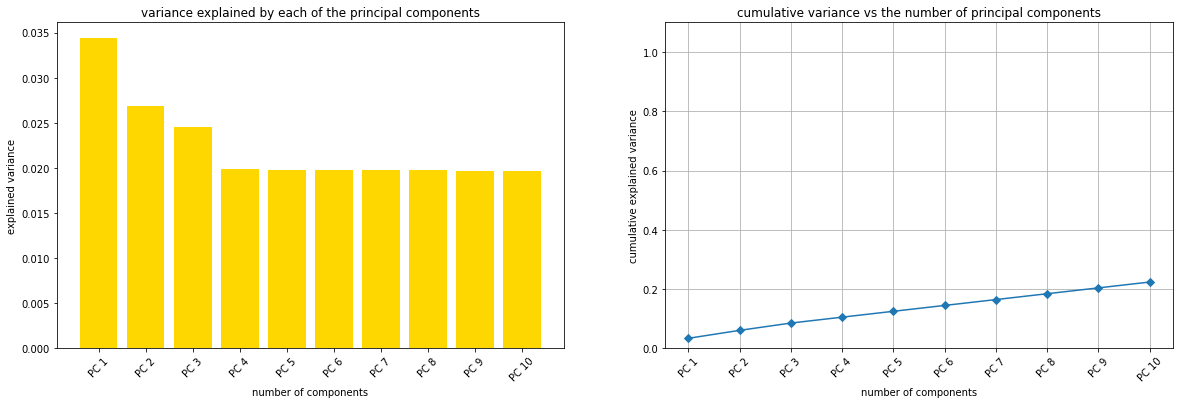

In [ ]:
# plotting the explained variance ratio for pca with 10 components
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_

ax1.bar(range(len(ratio)), ratio, color = 'gold')
ax1.set_xlabel('number of components')
ax1.set_ylabel('explained variance')
ax1.set_xticks(range(len(ratio)))
ax1.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))],rotation=45)
ax1.set_title('variance explained by each of the principal components')

ax2.plot(np.cumsum(ratio), marker = 'D')
ax2.set_xlabel('number of components')
ax2.set_ylabel('cumulative explained variance')
ax2.set_ylim(0,1.1)
ax2.set_xticks(range(len(ratio)))
ax2.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))],rotation=45)
ax2.set_title('cumulative variance vs the number of principal components')
ax2.grid()
plt.show()



## Inference - 
As observed, not much variance has been explained by the first 10 principal components. Only 20% of the variance has been captured by them.


## PCA with all max components

Taking n_components as the number of columns in the dataframe

In [ ]:
# performing pca with maximum components
pca_2 = PCA(n_components = numeric_dataframe.shape[1])
transformed_df_2 = pca_2.fit_transform(std_df)

In [ ]:
# creating the dataframe after pca
df_pca_2 = pd.DataFrame(transformed_df_2, columns = [f'PC{i}' for i in range(1,numeric_dataframe.shape[1] + 1)])
df_pca_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52
0,-0.210265,0.008837,-0.547270,-0.058414,-0.074516,-0.319455,-0.264361,-0.243680,-0.047039,-0.090332,...,-0.031302,0.082750,-0.098648,-0.083945,-0.054800,-0.101929,-0.061692,0.278038,0.102439,1.396993e-14
1,-0.262768,0.392509,-0.739177,-0.053911,-0.074476,-0.315408,-0.266531,-0.242916,-0.046847,-0.092549,...,-0.032985,0.077977,-0.098172,-0.082961,-0.054064,-0.091019,0.299842,0.054382,0.109068,-4.218221e-16
2,-0.251462,0.292364,-0.801782,-0.054593,-0.074620,-0.316027,-0.266222,-0.242420,-0.047674,-0.091942,...,-0.032855,0.078261,-0.098071,-0.082894,-0.054008,-0.090865,0.204198,-0.013829,0.109571,-2.766283e-15
3,-0.260106,0.350615,-0.862544,-0.053771,-0.074651,-0.315289,-0.266623,-0.242109,-0.047863,-0.092271,...,-0.033198,0.077266,-0.097935,-0.082654,-0.053826,-0.088366,0.258728,-0.083310,0.111204,-2.628642e-15
4,-0.232476,0.161704,-0.684494,-0.056354,-0.074572,-0.317607,-0.265364,-0.243001,-0.047382,-0.091200,...,-0.032139,0.080329,-0.098337,-0.083378,-0.054373,-0.095964,0.081666,0.120674,0.106284,-1.468332e-15


In [ ]:
# creating pca components dataframe
PCA_comp_max = pd.DataFrame(pca_2.components_, columns = numeric_col)
PCA_comp_max.head()

,score,free,installs,Price in USD,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,-0.074827,-0.663920,-0.053784,0.667523,-0.000570,-0.025661,0.036156,-0.006318,-0.028861,0.030843,...,-0.039685,-0.041224,-0.006808,0.042875,0.041169,0.028254,0.064397,-0.013480,0.179255,-0.030993
1,0.514978,-0.055474,0.506672,0.059876,0.050335,0.035623,0.041269,0.005320,-0.039082,-0.096689,...,0.027294,0.082547,-0.041453,0.013911,0.063976,0.024327,0.049159,0.131062,0.074357,0.043629
2,-0.462276,0.003326,0.477461,0.003916,-0.086963,-0.068435,-0.087840,-0.062856,-0.004528,0.077281,...,-0.098541,0.016601,-0.014468,-0.069514,0.273925,0.098491,-0.082504,-0.084751,-0.085689,-0.099930
3,0.006940,-0.012451,0.002751,-0.013810,-0.000144,-0.003735,0.004833,-0.007828,-0.027408,-0.017835,...,-0.022632,-0.016308,-0.168808,0.001281,-0.007119,-0.071868,-0.002526,0.005412,-0.062958,-0.004313
4,-0.000188,0.009795,0.000920,0.004182,-0.008730,0.000385,-0.042858,-0.010568,0.001326,-0.008386,...,0.001480,0.006255,0.806160,-0.036336,-0.012235,0.010389,-0.014052,-0.008042,-0.011845,0.000285


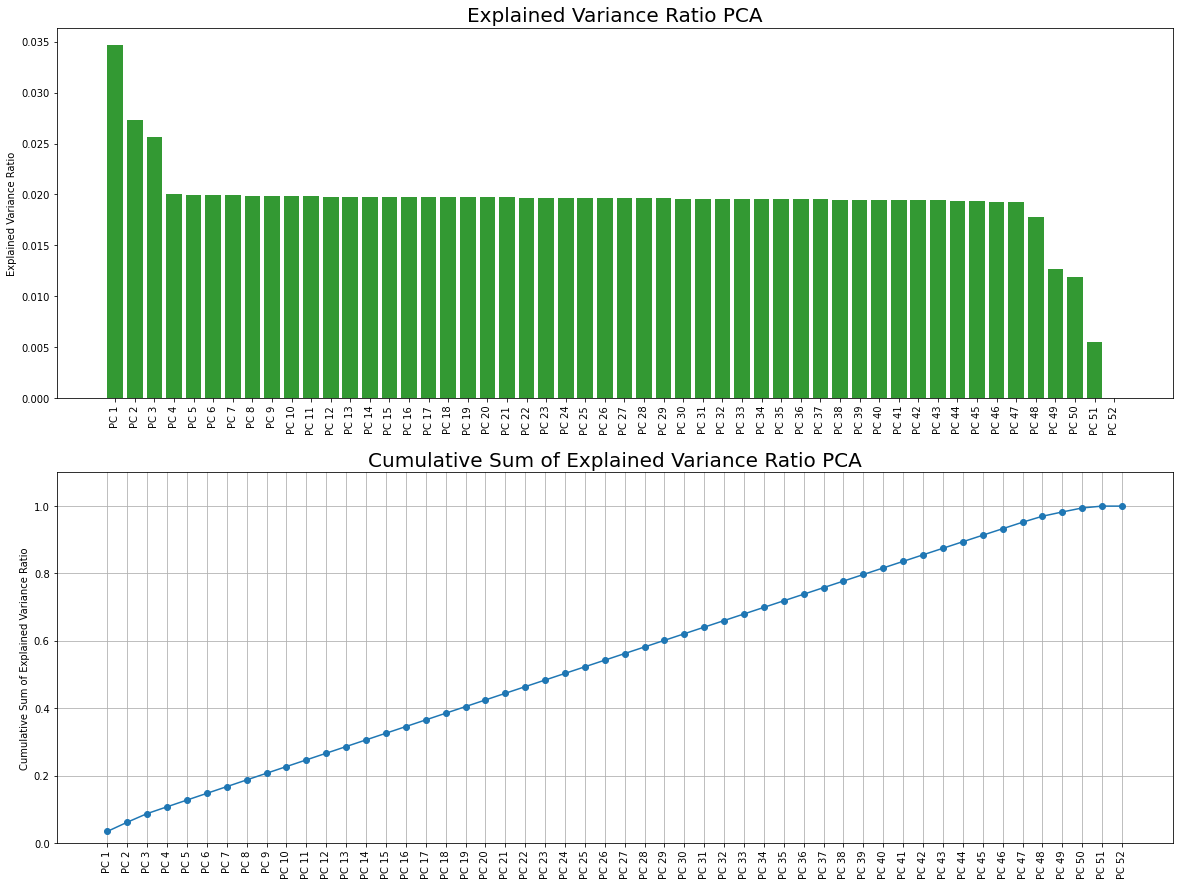

In [ ]:
# plotting the explained variance ratio for pca with maximum components
fig, ax = plt.subplots(2,1 , figsize=(20,15))
ax1, ax2 = ax.ravel()

ratio = pca_2.explained_variance_ratio_
ax1.bar(range(len(ratio)), ratio, alpha=0.8, color = 'green')
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_xticks(range(len(ratio)))
ax1.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))],rotation=90)
ax1.set_ylabel('Explained Variance Ratio')

ratio = pca_2.explained_variance_ratio_
ax2.plot(np.cumsum(ratio), 'o-')

ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)

ax2.set_ylim(0,1.1)
ax2.set_xticks(range(len(ratio)))
ax2.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))],rotation=90)
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');
ax2.grid()

## Inference - 

In this plot we are able to gather maximum variance as we have used all of the columns as the components.

## t-SNE

In [ ]:
# performing pca with 4 components
pca = PCA(n_components = 4)
transformed_df = pca.fit_transform(std_df)

df_pca = pd.DataFrame(transformed_df, columns = [f'PC{i}' for i in range(1,5)])
df_pca.head()

,PC1,PC2,PC3,PC4
0,-0.234751,-0.045298,-0.319122,1.259729
1,-0.290172,0.325155,-0.512672,1.257683
2,-0.279135,0.223768,-0.570238,1.257807
3,-0.288512,0.278696,-0.629956,1.257381
4,-0.258681,0.099773,-0.454515,1.258693


In [ ]:
# adding the genre column to the dataframe
df_pca['genre'] = final_df['genre']

In [ ]:
# performing t-sne with 3 components

tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=400)
tsne_results = tsne.fit_transform(df_pca.drop('genre', axis = 1))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2100 samples in 0.003s...
[t-SNE] Computed neighbors for 2100 samples in 0.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2100
[t-SNE] Computed conditional probabilities for sample 2000 / 2100
[t-SNE] Computed conditional probabilities for sample 2100 / 2100
[t-SNE] Mean sigma: 0.657759
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.989105
[t-SNE] KL divergence after 400 iterations: 0.149042


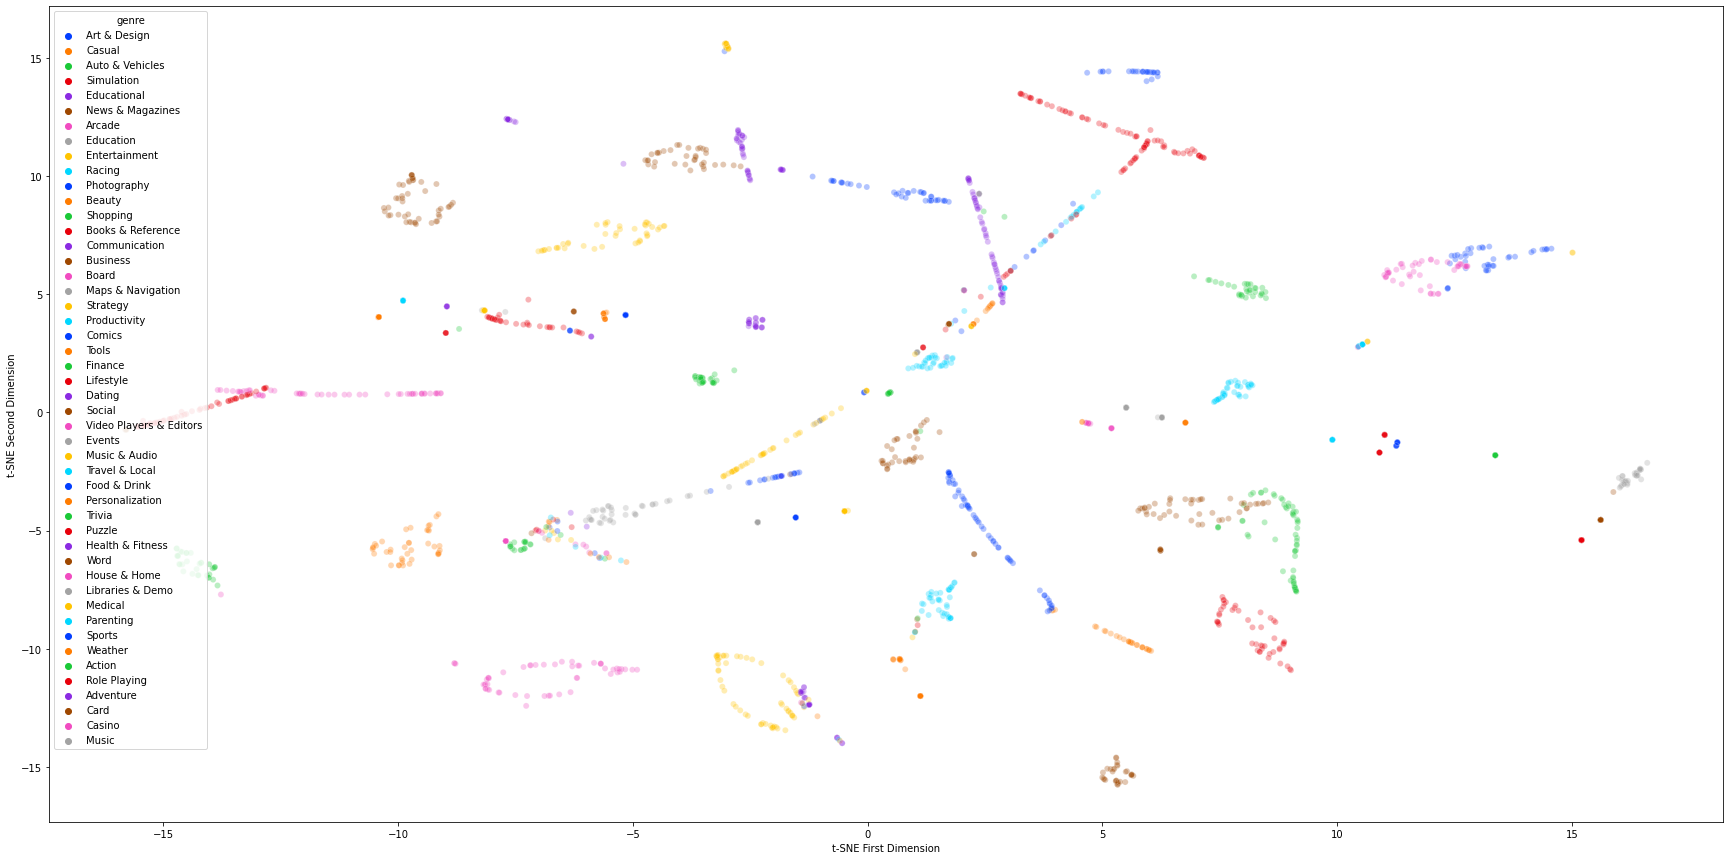

In [ ]:
# plotting the scatter plot for t-SNE
df_pca['t-SNE First Dimension'] = tsne_results[:,0]
df_pca['t-SNE Second Dimension'] = tsne_results[:,1]
df_pca['t-SNE Third Dimension'] = tsne_results[:,2]
plt.figure(figsize=(30,15))
sns.scatterplot(
    x="t-SNE First Dimension", y="t-SNE Second Dimension",
    hue="genre",
    palette=sns.color_palette("bright", 48),
    data=df_pca,
    legend="full",
    alpha=0.3
)

## Inference - 
This plot suggests that a genre is the most important deciding factor for measuring the similarities or dissimilarities of other applications from different genres. 

# <font color=#ADD8E6>Recommendation System</font>

In [ ]:
# Loading the cleaned Apps Dataset.

app_df = pd.read_csv(f"{ASSETS_DIRECTORY}/engineered_apps_data.csv")
app_df.head()

,appId,title,score,genre,free,description,developer,installs,Price in USD
0,com.brakefield.idfree,Infinite Design,3.740000,Art & Design,1,"Rebuilt from the ground up: blazing fast, incr...",Infinite Studio LLC,10000000,0.0
1,com.canva.editor,"Canva: Design, Photo & Video",4.738635,Art & Design,1,<b>Canva is your free photo editor and video e...,Canva,100000000,0.0
2,com.adobe.spark.post,Adobe Express: Graphic Design,4.681319,Art & Design,1,Adobe Express enables you to quickly and easil...,Adobe,10000000,0.0
3,com.delgeo.desygner,Desygner: Graphic Design Maker,4.890000,Art & Design,1,⭐ <b><i>“THE EASIEST & BEST GRAPHIC DESIGN APP...,Desygner Pty Ltd,5000000,0.0
4,com.brakefield.painter,Infinite Painter,4.247525,Art & Design,1,"Experience one of the best-designed painting, ...",Infinite Studio LLC,10000000,0.0


In [ ]:
# Seeing different Unique genre in our Dataset.

print(f"No. of Genres : {app_df.genre.nunique()}")

No. of Genres : 48


In [ ]:
# One-Hot Encoding the Genre Column.

one_hot = pd.get_dummies(app_df['genre'])
app_df = app_df.join(one_hot)
app_df = app_df.drop('genre', axis=1)
app_df.shape

(2100, 56)

In [ ]:
# Loading the reviews dataframe here.

reviews = pd.read_csv(f"{ASSETS_DIRECTORY}reviews.csv")

In [ ]:
reviews.head(3)

,appId,reviewId,userName,userImage,content,score,thumbsUpCount
0,com.brakefield.idfree,e0ba31b2-28e9-4746-b29d-99e13188b9b6,Tariq Naqi,https://play-lh.googleusercontent.com/a-/ACNPE...,It nice however no clipping mask option and fi...,3,0
1,com.brakefield.idfree,e4021b2a-f5a5-4146-a713-a6c7ea2033a3,sakirunnisha Shaikh,https://play-lh.googleusercontent.com/a-/ACNPE...,Rug in my bedroom with my hair cut off and the...,5,0
2,com.brakefield.idfree,b926cb99-13a9-48cf-a95f-4c9f28657fc7,Mochamad Rizki,https://play-lh.googleusercontent.com/a-/ACNPE...,i'll give 5 start if u fix bug,3,0


In [ ]:
# Seeing the Null values in Apps dataframe.

app_df.isnull().sum()[:6]

appId           0
title           0
score          11
free            0
description     0
developer       0
dtype: int64

In [ ]:
# Filling Null values in Score column with mean.

app_df['score'].fillna(np.mean(app_df['score']), inplace=True)


## Selecting Unique Users

* Firstly, we need to see the topmost users with maximum amount of apps rated. We will also encounter a lot of anonymous reviews which we would have to drop, inorder to keep only unique entries.

* Then, we will make our unique users dictionary and map them to a integer value for every user, so that we can easily transfer that to the deep learning model.

In [ ]:
# These top active users contain duplicates of users with same names.

reviews['userName'].value_counts().nlargest(5)

A Google user    6021
Deepak Kumar       24
David              24
Michael            23
M                  22
Name: userName, dtype: int64

In [ ]:
# We will filter unique users with multiple reviews based on their unique user-images.

reviews['userImage'].value_counts().nlargest(5)

https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g    6019
https://play-lh.googleusercontent.com/a-/ACNPEu9Fprwh8vwxWCagi7bomTkCMN_NFdFFtoH4lVH3                                         20
https://play-lh.googleusercontent.com/a/ALm5wu1ojw9AA42dFryf0q3bFh7ku1D7_znzWA-UC1Xk=mo                                       13
https://play-lh.googleusercontent.com/a-/ACNPEu_R90kK2shvo9GBIMTh65BbmIns_INYG9_mUXCs                                         12
https://play-lh.googleusercontent.com/a/ALm5wu1DqXvxjLoZX3LOYrpSoKWv4n4zJ38Aa1jxlRkz=mo                                       11
Name: userImage, dtype: int64

In [ ]:
# Making a list of top 1000 unique users leaving out first entry for anonymous reviews.

unique_list = reviews['userImage'].value_counts().nlargest(1001)[1:]

print(f"Lowest No. of Reviews in list : {min(unique_list)}")

Lowest No. of Reviews in list : 2


## Feature-Based Hybrid Model

* Before building this model, we need our data in a particular format. We need to make a singular dataset for all the unique users their reviews alongwith app ID and features of the app.

* We will also encode the app Id with a No. and then standardise the rest of the dataset before feeding it to the model.

In [ ]:
# Making a user dictionary.

unique_names = unique_list.index
user_dict = {user:i for (user, i) in zip(unique_names, range(len(unique_names)))}
n_users = len(user_dict) 

In [ ]:
# Making a dataframe with proper users and apps rated alongwith features.

for i, user in enumerate(unique_names):

  app_list = reviews[reviews['userImage']==user]['appId']   #Getting appID of apps this user has rated.
  X = app_df[app_df['appId'].isin(app_list)].drop(['title','developer','description','Price in USD'], axis=1)

  Y = reviews['score'][(reviews['userImage']==user) & (reviews['appId'].isin(X['appId']))]

  if len(X)==len(Y):

    X['y'] = Y.values      # Users rating same app multiple times can cause an index error here.
  
  else:
    count = Counter(app_list)
    extra_apps = [key for key in count.keys() if count[key]>1 ]
    
    for app in extra_apps:
      
      row = app_df[app_df['appId']==app].drop(['title','developer','description','Price in USD'], axis=1)  # Manually adding duplicates for same apps rated twice.
      X = pd.concat([X,row])
      
    X.sort_index(axis=0, inplace=True)
    X['y'] = Y.values

  X['user'] = user
  
  if i==0:
    model_df = X

  else:
    model_df = pd.concat([model_df, X])

In [ ]:
# Making a apps dictionary.

apps_to_take = model_df['appId']
apps_dict = {app:i for (app, i) in zip(apps_to_take.unique(), range(len(apps_to_take.unique())))}
n_apps = len(apps_dict)

In [ ]:
# Now Mapping the user No. and App No. in the dataframe created above.

model_df['appId'] = model_df['appId'].map(apps_dict)
model_df['user'] = model_df['user'].map(user_dict)

In [ ]:
# Saving the dataframe for easy access later.

model_df.to_csv(f"{ASSETS_DIRECTORY}/Model_df.csv")

In [ ]:
# Reading the dataframe.
model_df = pd.read_csv(f"{ASSETS_DIRECTORY}/Model_df.csv", index_col=0)

In [ ]:
userid = 1000
appvals = list(apps_dict.keys())[:2]
app_idx = [val for key, val in apps_dict.items() if key in appvals]

X_df = model_df[model_df['appId'].isin(app_idx)][:len(appvals)]
X_df['user'] = userid
new_df = pd.concat([model_df, X_df])
new_df.tail()

,appId,score,free,installs,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,...,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word,y,user
1350,1127,4.400000,1,1000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,998
996,1128,4.584718,1,50000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,999
1144,1129,4.395986,1,10000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,999
123,0,4.260000,1,10000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1000
165,1,3.954741,1,500000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1000


In [ ]:
model_df.head()

,appId,score,free,installs,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,...,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word,y,user
123,0,4.260000,1,10000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
165,1,3.954741,1,500000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
172,2,2.744800,1,100000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
228,3,3.860294,1,100000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
312,4,4.104972,1,100000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


* Now we will standardise the specific feature columns in the dataset and split the dataframe into train and test with about 75% data in training set. We would also stratify the split on y(Ratings) in order to have a uniform distribution.

In [ ]:
# Now we scale the dataset and split it before building the model.

scaler = StandardScaler()
df_to_std = model_df.drop(['appId','user', 'y'], axis=1)

df_std = scaler.fit_transform(df_to_std)
df_std = pd.DataFrame(df_std, columns = df_to_std.columns)
print(df_std.shape)

df_std = model_df[['appId','user','y']].join(df_std)
print(f'Shape : {df_std.shape}')

(2854, 51)
Shape : (2854, 54)


In [ ]:
# Splitting the dataset.

train, test = train_test_split(df_std, train_size=0.75, random_state=40, stratify = df_std['y'])

print(f"""Train Shape :  {train.shape}
Test Shape : {test.shape}""")

Train Shape :  (2140, 54)
Test Shape : (714, 54)


In [ ]:
# Also Making a list of app features.

features = df_to_std.columns
n_features = len(features)

### Model Structure

* We build our model to get the user and app embeddings for the training set, and we also input the features of the apps in out dataset to build a feature-based hybrid model.

In [ ]:
# Building Model Input layers.
 
users_in = layers.Input(shape=(1, ), name='User Input')
apps_in = layers.Input(shape=(1, ), name='App Input')

features_in = layers.Input(shape=(n_features, ), name='Feature Input')

In [ ]:
# Creating embeddings, flattening the output and getting Dot product.
embed_size = 50
reg = regularizers.L1(0.001)

users_embed = layers.Embedding(input_dim = n_users, output_dim = embed_size, embeddings_regularizer=reg, name='User-Embedding')(users_in)
apps_embed = layers.Embedding(input_dim = n_apps, output_dim = embed_size, embeddings_regularizer=reg, name='App-Embedding')(apps_in)

users_flat = layers.Flatten()(users_embed)
apps_flat = layers.Flatten()(apps_embed)

dot_prd = layers.Dot(normalize=True, axes=1)([users_flat, apps_flat])

# Dense layer for features input.

feat_1 = layers.Dense(units = n_features, activation='relu', kernel_regularizer = reg)(features_in)

In [ ]:
# Merging the layers to get final output and compiling the model.

merged = layers.Concatenate()([dot_prd, feat_1])

dense_1 = layers.Dense(units = 256, activation='relu', kernel_regularizer = reg)(merged)
dropout_1 = layers.Dropout(0.2)(dense_1)

dense_2 = layers.Dense(units = 128, activation='relu', kernel_regularizer = reg)(dropout_1)
dropout_2 = layers.Dropout(0.2)(dense_2)

dense_3 = layers.Dense(units = 64,activation='relu', kernel_regularizer = reg)(dropout_2)

output = layers.Dense(1, activation='linear')(dense_3)

hyb_model = models.Model(inputs = [users_in, apps_in, features_in], outputs = output)

hyb_model.compile(optimizer= optimizers.Adam(0.001), loss='mean_absolute_error', metrics=['mse'])

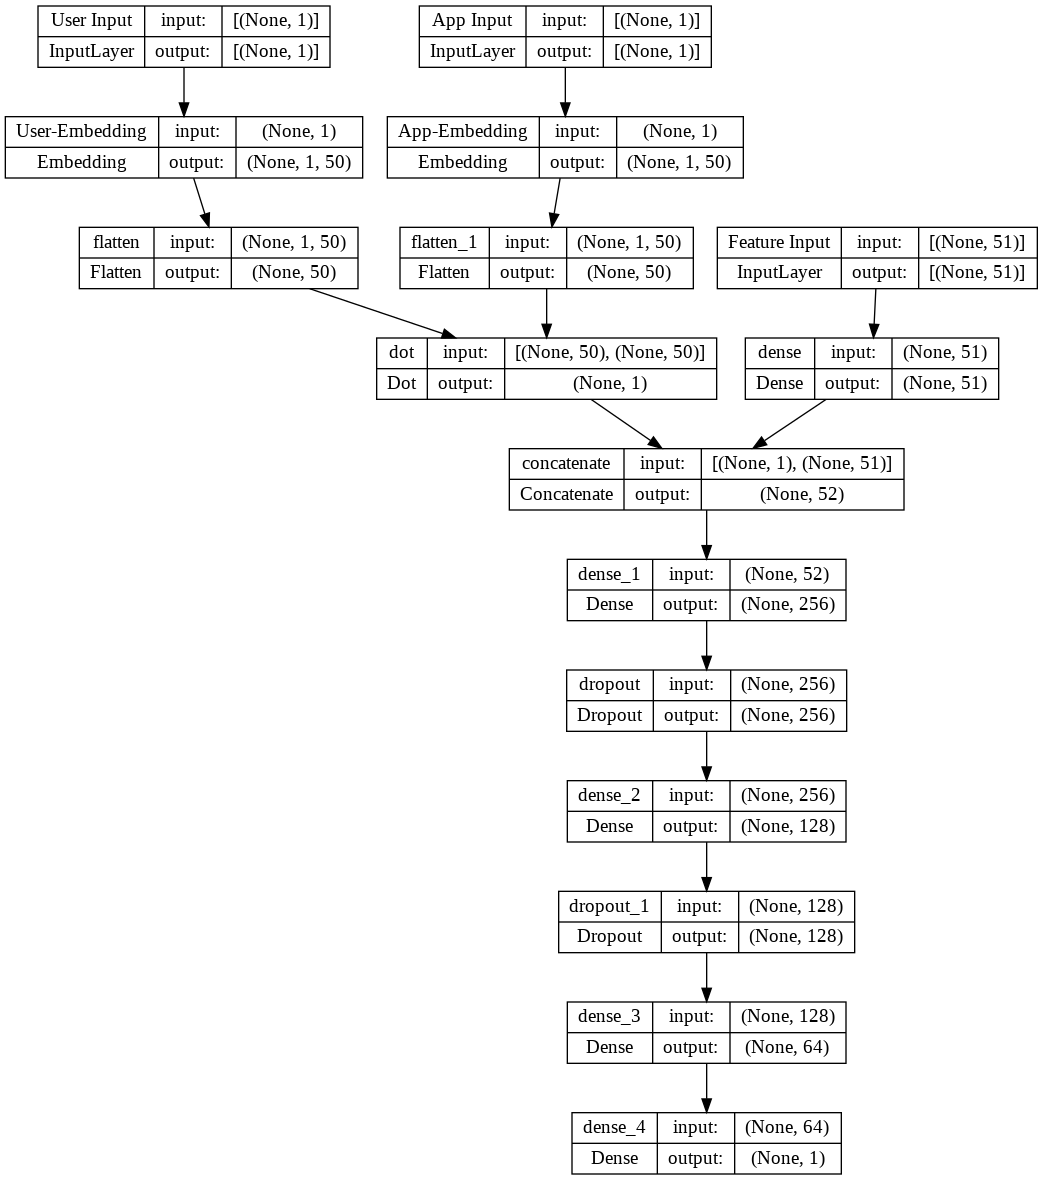

In [ ]:
# Plotting the model structure.

utils.plot_model(hyb_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Fitting the model on the train data.

history = hyb_model.fit(x = [train['user'], train['appId'], train[features]],
                        y = train['y'], epochs=50, batch_size = 32, 
                        validation_split = 0.3, verbose=0)

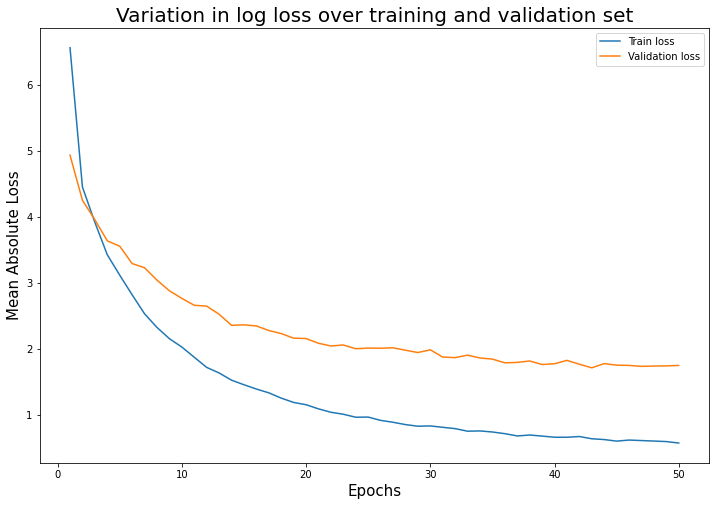

In [ ]:
# Plotting the loss and validation loss over the training epochs.

plt.figure(figsize=(12,8))

plt.plot(np.arange(1, 51),history.history['loss'], label='Train loss')
plt.plot(np.arange(1, 51),history.history['val_loss'], label='Validation loss')

plt.xlabel("Epochs", size=15)
plt.ylabel("Mean Absolute Loss", size=15)
plt.title("Variation in log loss over training and validation set", size=20)
plt.legend()
plt.show()

* Here from the plot for training and validation loss, we observe that both decrease over the range of epochs, although the validation loss curve starts to flatten out after approximately 30-35 epochs.

In [ ]:
# Saving the model to the drive.

hyb_model.save(f"{ASSETS_DIRECTORY}/hyb_model.h5")

### Analysing Results and Recommendations

* First we predict on the test set users and see how the what is the absolute loss and MSE of the model.

* Then, we take out the user and app embeddings from the model and use them to make the recommenation for various users.

In [ ]:
# Evaluating on the test set.

results = hyb_model.evaluate([test['user'], test['appId'], test[features]],
                             y = test['y'], batch_size=1)

714/714 [==============================] - 2s 2ms/step - loss: 1.7757 - mse: 2.7666


In [ ]:
# Getting the test predictions and storing in the test dataframe.

y_pred = hyb_model.predict([test['user'], test['appId'], test[features]])

test['y_pred'] = y_pred

23/23 [==============================] - 0s 2ms/step


In [ ]:
# Getting the Apps and user embeddings.

App_embedding = hyb_model.get_layer(name = "App-Embedding").get_weights()[0]
App_embedding.shape

(1130, 50)

In [ ]:
user_embedding = hyb_model.get_layer(name = "User-Embedding").get_weights()[0]
user_embedding.shape

(1000, 50)

Now we will build some functions mainly to do three important tasks:

* First, to get the appId for the apps that the user has not rated yet.
* Secondly, to compute the scores for the selected apps above depending on the measure we want to use.
* And at last, to filter the best scores out of the above list and recommend the top 5 apps for the users.

In [ ]:
# Function to calculate score of an user-app pair based on dot product or cosine similarity.

def compute_score(user_val, app_val, measure='dot'):

  u = user_val
  a = app_val  
  
  if measure == 'cosine':

    u = u / (np.linalg.norm(u))
    a = a / (np.linalg.norm(a, keepdims=True))

  scores = u.dot(a.T)
  return scores

In [ ]:
# Getting apps already rated by a particular user.

def get_apps(id):

  for key in user_dict.keys():
    
    if user_dict[key]==id:
      user_id = key

  return reviews['appId'][reviews['userImage']==user_id].unique(), reviews['userName'][reviews['userImage']==user_id].unique()


In [ ]:
# Function to provide recommendation based on user-Id.

def Top_Recommendation(id, measure, n=5):

  scores = []
  vals, name = get_apps(id)

  select_apps = [app for app in apps_dict.keys() if app not in vals]  # Retrieving apps which are not in user's rated apps.
  select_apps = list(map(lambda x: apps_dict.get(x), select_apps))  # Getting Indexes for apps in app-embedding.
  
  for idx in select_apps:

    score = compute_score(user_embedding[id], App_embedding[idx], measure=measure)   # Calculating the top scores based on the measure
    scores.append(score)

  best_idx = np.argsort(scores)[-n:]    
  best_scores = np.sort(scores)[-n:]        
                                                                        # Taking the top 5 scores and returning the recommended apps.
  pos = [list(apps_dict.values()).index(i) for i in best_idx]
  app_id = [list(apps_dict.keys())[i] for i in pos]

  table = PrettyTable(['Apps','Recommendation Score'])        # Forming a table for the apps and scores.
  table.title = f'Recommendation For {name[0]}'

  for i in range(n-1,-1, -1):

    table.add_row([app_df['title'][app_df['appId']==app_id[i]].values[0], f'{best_scores[i]*100:.2f} %'])

  return table

In [ ]:
# Displaying Recommendation for a Random user. Use Id values from 0 to 999.

print(Top_Recommendation(29,'cosine'))

+-------------------------------------------------------+
|           Recommendation For Mikeala Russell          |
+--------------------------------+----------------------+
|              Apps              | Recommendation Score |
+--------------------------------+----------------------+
|      Black Desert Mobile       |       75.17 %        |
|  LiveBoard: Online Whiteboard  |       69.93 %        |
| Cashman Casino Las Vegas Slots |       68.85 %        |
| BladeBound: RPG Adventure Game |       58.95 %        |
|   Japan Official Travel App    |       53.63 %        |
+--------------------------------+----------------------+


* Here, we see top 5 apps recommended for a random user generated based on the similarity scores from the user embedding and app embeddings for the apps, that the user has not seen before.

# <font color=#ADD8E6>Deployed Application</font>
</br>
<p>
<B>APP LINK</B> : <a href='https://freakyeinstein-dive-into-playstore-deploy-ki4ke0.streamlitapp.com/'>dive-into-playstore</a></br>
</p>

## <font color='red'>Please ensure that you delete cache before running the application.</font>
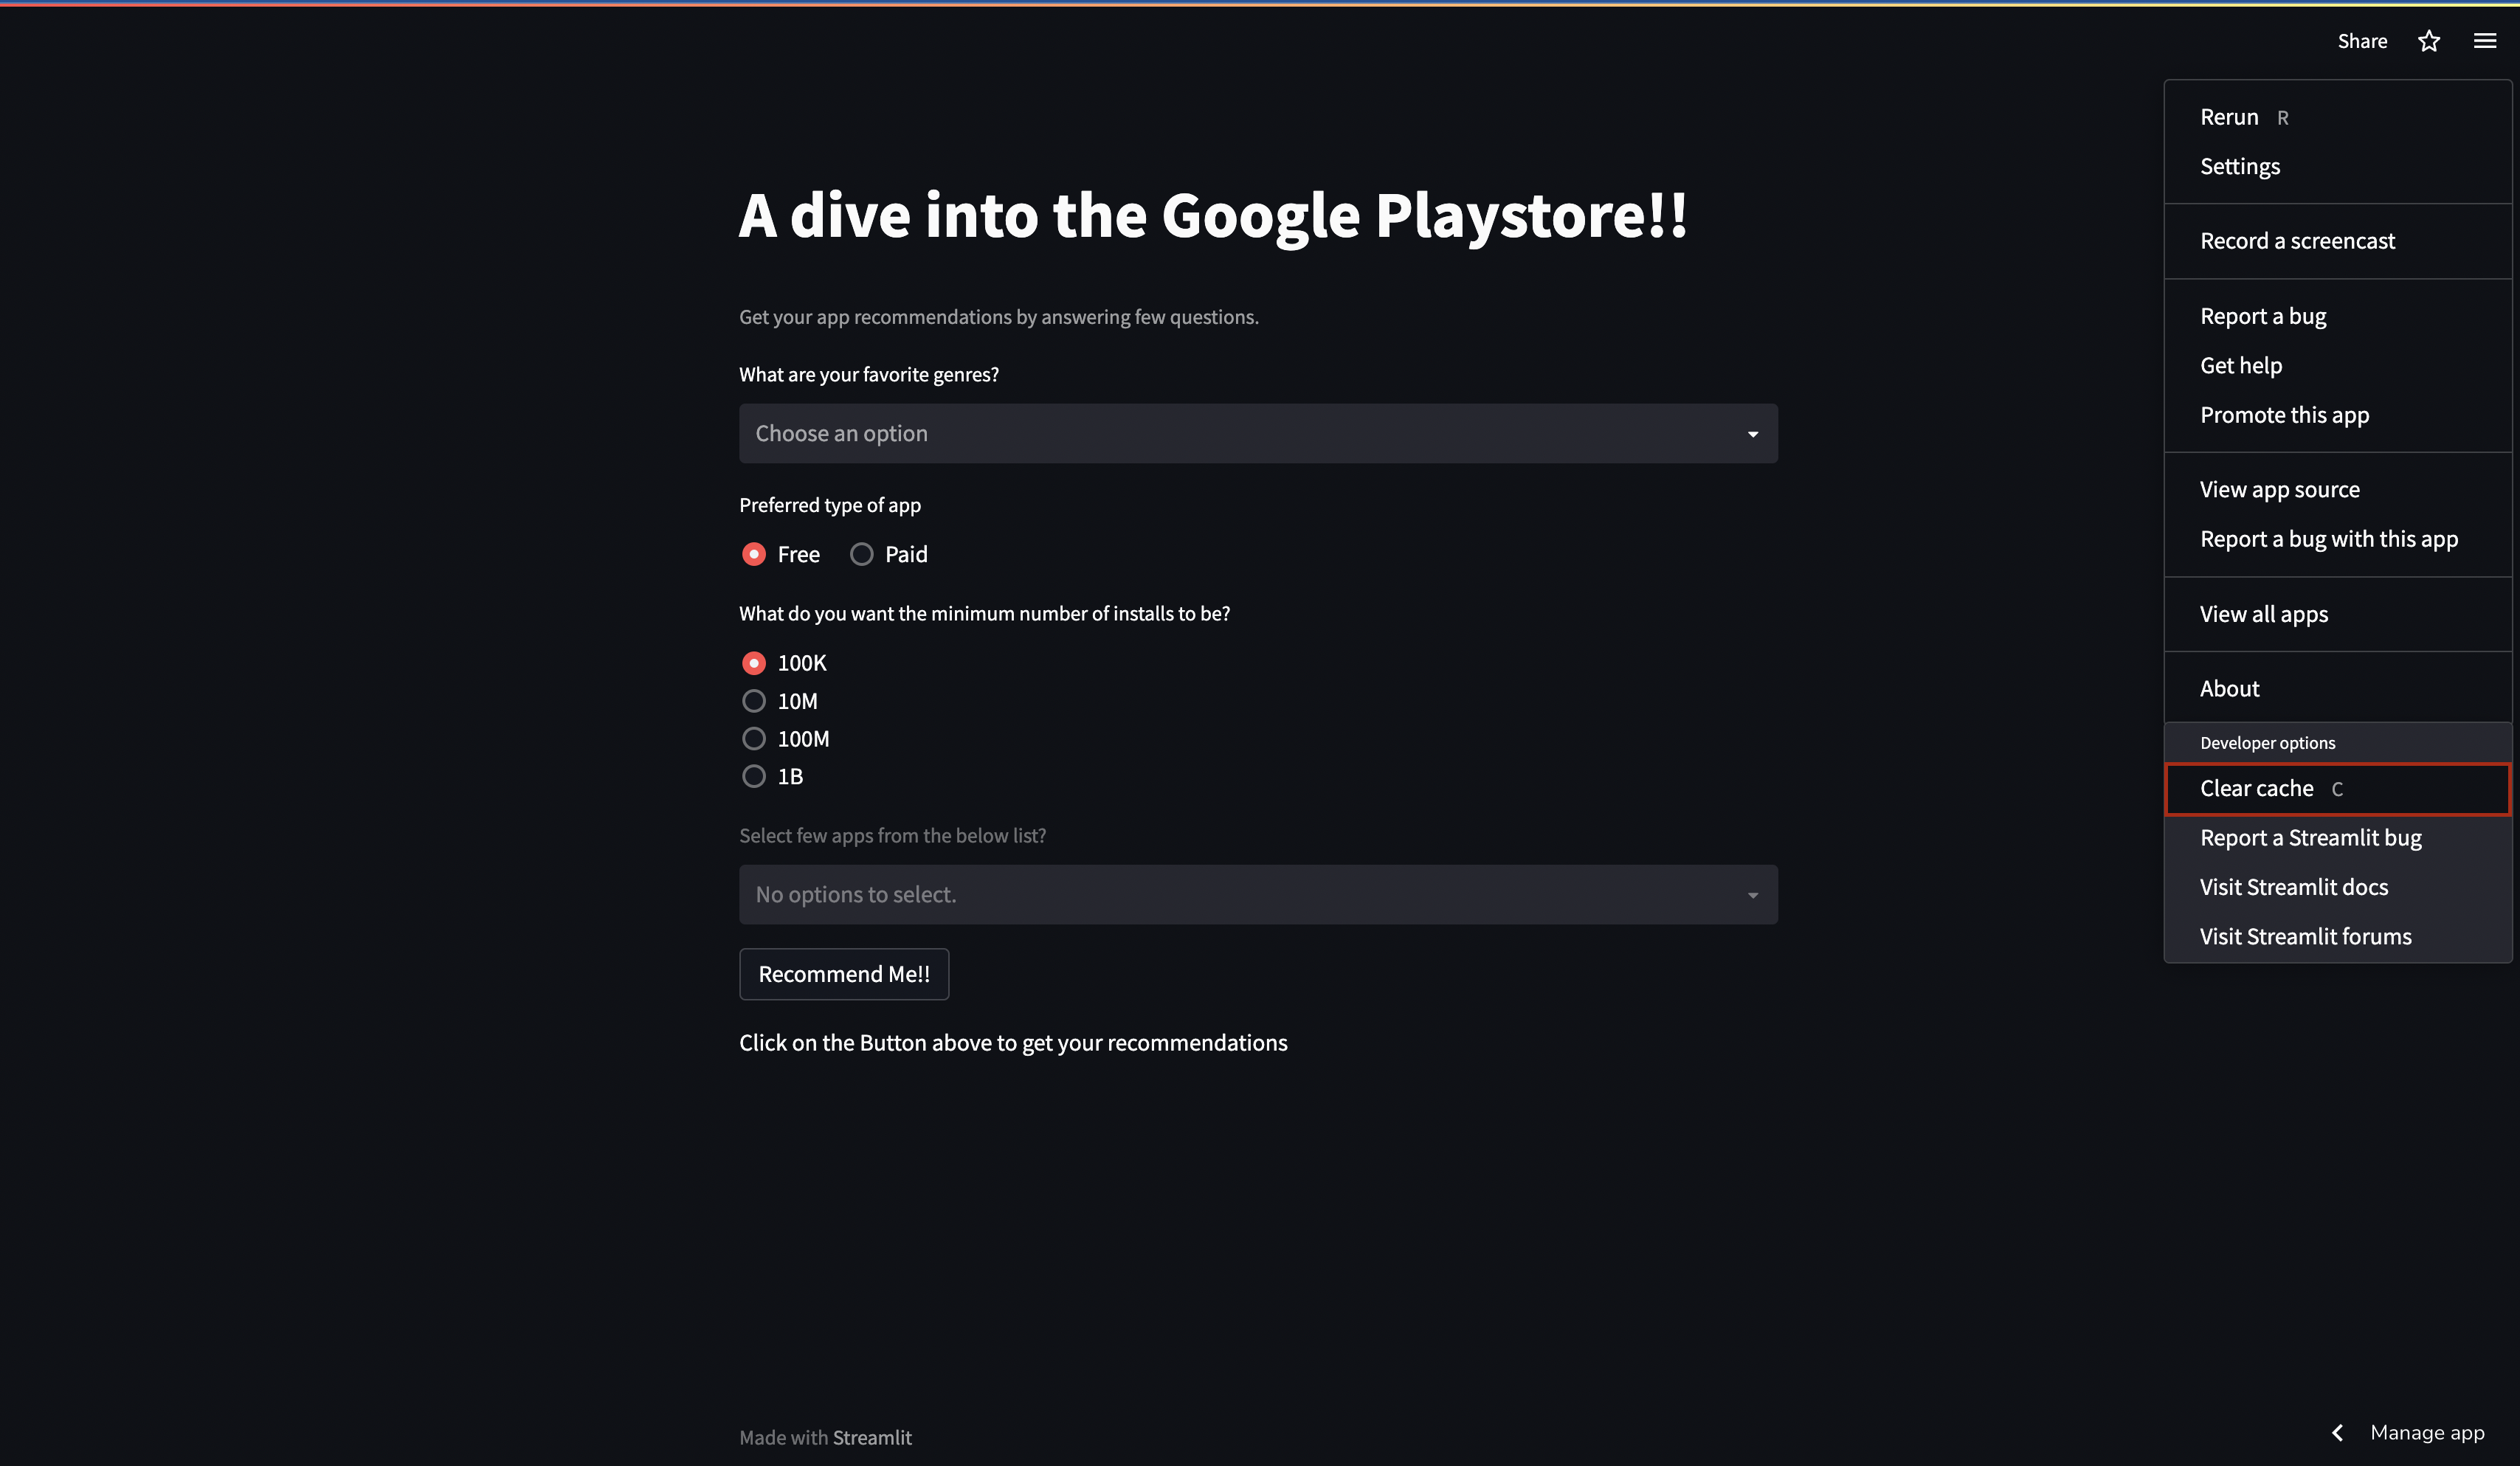

# <B><font color=#2FFF00> CONCLUSION </font></B>

<P><ol type='1'>
<li><p>Exploratory analysis for top developers show that tech giants such as Google, Microsoft and EA have a significant no. of apps compared to others.</p></li>

<li><p>Another interesting observation being a majority of Fitness and Shopping apps, with Sports and Music apps coming just behind them.</p></li>

<li><p>As observed, not much variance has been explained by the first 10 principal components. Only 20% of the variance has been captured by them.</p></li>

<li><p>Incorporating the apps data, we built a feature-based hybrid model to recommend apps to a user based on his preferences selected. You can try this out by accessing the deployed model on Streamlit.</p></li>

</ol>
</P>